# COURSERA CAPSTONE NOTEBOOK
## Alternative NASDAQ stock price predictor

#### Background:

I never quite understood how stock prices work. When I go on websites to read about stock quotes, it’s common for me to look at historical prices and graphs that show trends of prices. However, there are often other information of the stock, for example dividend yield, volume, etc. which I am never quite able to wrap my mind around how these indices affect the price. This project aims to analyse stock quotes of the components in US NASDAQ and see how well a model predicts prices using indices other than historical prices.

#### Data Description:

I would use the yfinance library ticker module to obtain information of stocks in NASDAQ-100.


#### Methodology:

I would import the information dictionary into a pandas DataFrame and clean the irrelevant information. The remaining data, namely the market cap, enterprise value, enterprise value/revenue, enterprise value/EBITDA, financial data, entire balance sheet, entire cash flow statement, entire share statistics, entire dividends & splits values except the forward values. The variable to be predicted is the stock price. I would split the data into train and test sets. I would train the model with the train set and use the model to predict results for the test set. Then I would run accuracy analysis on the results and see how well the model performs. 
I would also rank each variable by their correlation to the price. Some graphs will be plotted for visualization.


In [1]:
# import libraries
!pip install yfinance
import yfinance as yf
import pandas as pd

In [2]:
# import more libraries
!pip install bs4
import requests
from bs4 import BeautifulSoup

In [3]:
# website containing tickers of stocks in NASDAQ-100 for webscraping
url= "https://en.wikipedia.org/wiki/Nasdaq-100"

In [4]:
# scrape the website
html_data= requests.get(url).text

In [5]:
soup=BeautifulSoup(html_data,"html5lib")

In [6]:
# save the tickers in a list
list_of_tickers=[]
for x in range(1,408,4):
    list_of_tickers.append(soup.find_all("tbody")[3].find_all("td")[x].text)
print(list_of_tickers)

['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'TEAM', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'FB', 'FAST', 'FISV', 'FOXA', 'FOX', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LULU', 'MAR', 'MRVL', 'MTCH', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'OKTA', 'PCAR', 'PAYX', 'PYPL', 'PTON', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'TCOM', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX', 'ZM']


In [7]:
# let's have a look at what Apple ticker.info contains and choose the relevant keys into our analysis
yf.Ticker("AAPL").info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand r

In [8]:
# input the relevant data from ticker.info into our Dataframe
raw_data=pd.DataFrame()
for i in ['symbol',
          'previousClose',
           'marketCap',
           'enterpriseValue',
           'enterpriseToRevenue',
           'enterpriseToEbitda',
           'profitMargins',
           'trailingAnnualDividendYield',
           'payoutRatio',
           'averageDailyVolume10Day',
           'trailingAnnualDividendRate',
           'averageVolume',
           'askSize',
           'fiveYearAvgDividendYield',
           'bidSize',
           'dividendYield',
           'sharesOutstanding',
           'bookValue',
           'sharesShort',
           'sharesPercentSharesOut',
           'netIncomeToCommon',
           'trailingEps',
           'lastDividendValue',
           'shortRatio',
           'floatShares',
           'earningsQuarterlyGrowth',
           'shortPercentOfFloat',
           'sharesShortPriorMonth',
           'heldPercentInstitutions',
           'heldPercentInsiders']:
    temporary_list=[]
    for x in list_of_tickers:
        try:
            temporary_list=temporary_list + [yf.Ticker(x).info[i]] 
        except KeyError:
            temporary_list=temporary_list + [float("NaN")]
    raw_data[i]=temporary_list
print(raw_data)

    symbol  previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
0     ATVI          92.51   71687593984      64643350528                7.540   
1     ADBE         578.26  277077458944     274128715776               19.051   
2      AMD          86.10  104030019584      99278061568                8.692   
3     ALXN         180.72   40389013504      39171989504                6.256   
4     ALGN         617.39   48667422720      46896181248               16.655   
..     ...            ...           ...              ...                  ...   
97     WBA          52.10   45086789632      86552657920                0.607   
98    WDAY         241.71   60020998144      58190729216               13.005   
99     XEL          66.26   36113686528      59057434624                4.819   
100   XLNX         133.71   32485267456      30635730944                9.733   
101     ZM         373.40  109746798592     106471219200               32.466   

     enterpriseToEbitda  pr

In [9]:
#take a look at what's in financials and pick the relevant ones
yf.Ticker('AAPL').financials.iloc[:,0]

Research Development                       1.8752e+10
Effect Of Accounting Charges                     None
Income Before Tax                          6.7091e+10
Minority Interest                                None
Net Income                                 5.7411e+10
Selling General Administrative             1.9916e+10
Gross Profit                              1.04956e+11
Ebit                                       6.6288e+10
Operating Income                           6.6288e+10
Other Operating Expenses                         None
Interest Expense                           -2.873e+09
Extraordinary Items                              None
Non Recurring                                    None
Other Items                                      None
Income Tax Expense                           9.68e+09
Total Revenue                             2.74515e+11
Total Operating Expenses                  2.08227e+11
Cost Of Revenue                           1.69559e+11
Total Other Income Expense N

In [10]:
for i in ['Research Development',
          'Income Before Tax',
          'Net Income',
          'Selling General Administrative',
          'Gross Profit',
          'Ebit',
          'Operating Income',
          'Interest expenses',
          'Income Tax Expense',
          'Total Revenue',
          'Total Operating Expenses',
          'Cost of Revenue',
          'Total Other Income Expense Net',
          'Net Income From Continuing Ops',
          'Net Income Applicable To Common Shares']:
    temporary_list=[]
    for x in list_of_tickers:
        try:
            temporary_list=temporary_list + [yf.Ticker(x).financials.iloc[:,0][i]] 
        except KeyError:
            temporary_list=temporary_list + [float("NaN")]
    raw_data[i]=temporary_list
print(raw_data)

    symbol  previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
0     ATVI          92.51   71687593984      64643350528                7.540   
1     ADBE         578.26  277077458944     274128715776               19.051   
2      AMD          86.10  104030019584      99278061568                8.692   
3     ALXN         180.72   40389013504      39171989504                6.256   
4     ALGN         617.39   48667422720      46896181248               16.655   
..     ...            ...           ...              ...                  ...   
97     WBA          52.10   45086789632      86552657920                0.607   
98    WDAY         241.71   60020998144      58190729216               13.005   
99     XEL          66.26   36113686528      59057434624                4.819   
100   XLNX         133.71   32485267456      30635730944                9.733   
101     ZM         373.40  109746798592     106471219200               32.466   

     enterpriseToEbitda  pr

In [11]:
#input stuff from balance_sheet
for i in yf.Ticker('AAPL').balance_sheet.index.tolist():
    temporary_list=[]
    for x in list_of_tickers:
        try:
            temporary_list=temporary_list + [yf.Ticker(x).balance_sheet.iloc[:,0][i]] 
        except KeyError:
            temporary_list=temporary_list + [float("NaN")]
    raw_data[i]=temporary_list
print(raw_data)

    symbol  previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
0     ATVI          92.51   71687593984      64643350528                7.540   
1     ADBE         578.26  277077458944     274128715776               19.051   
2      AMD          86.10  104030019584      99278061568                8.692   
3     ALXN         180.72   40389013504      39171989504                6.256   
4     ALGN         617.39   48667422720      46896181248               16.655   
..     ...            ...           ...              ...                  ...   
97     WBA          52.10   45086789632      86552657920                0.607   
98    WDAY         241.71   60020998144      58190729216               13.005   
99     XEL          66.26   36113686528      59057434624                4.819   
100   XLNX         133.71   32485267456      30635730944                9.733   
101     ZM         373.40  109746798592     106471219200               32.466   

     enterpriseToEbitda  pr

In [12]:
# input stuff in cashflow
for i in yf.Ticker('AAPL').cashflow.index.tolist():
    temporary_list=[]
    for x in list_of_tickers:
        try:
            temporary_list=temporary_list + [yf.Ticker(x).cashflow.iloc[:,0][i]] 
        except KeyError:
            temporary_list=temporary_list + [float("NaN")]
    raw_data[i]=temporary_list
print(raw_data)

    symbol  previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
0     ATVI          92.51   71687593984      64643350528                7.540   
1     ADBE         578.26  277077458944     274128715776               19.051   
2      AMD          86.10  104030019584      99278061568                8.692   
3     ALXN         180.72   40389013504      39171989504                6.256   
4     ALGN         617.39   48667422720      46896181248               16.655   
..     ...            ...           ...              ...                  ...   
97     WBA          52.10   45086789632      86552657920                0.607   
98    WDAY         241.71   60020998144      58190729216               13.005   
99     XEL          66.26   36113686528      59057434624                4.819   
100   XLNX         133.71   32485267456      30635730944                9.733   
101     ZM         373.40  109746798592     106471219200               32.466   

     enterpriseToEbitda  pr

In [13]:
#reset index of dataframe to the symbol for easy reference
raw_data.set_index('symbol', inplace=True)
print(raw_data)

        previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
symbol                                                                      
ATVI            92.51   71687593984      64643350528                7.540   
ADBE           578.26  277077458944     274128715776               19.051   
AMD             86.10  104030019584      99278061568                8.692   
ALXN           180.72   40389013504      39171989504                6.256   
ALGN           617.39   48667422720      46896181248               16.655   
...               ...           ...              ...                  ...   
WBA             52.10   45086789632      86552657920                0.607   
WDAY           241.71   60020998144      58190729216               13.005   
XEL             66.26   36113686528      59057434624                4.819   
XLNX           133.71   32485267456      30635730944                9.733   
ZM             373.40  109746798592     106471219200               32.466   

In [15]:
pd.set_option('display.max_rows',85)
raw_data.isna().any()

previousClose                                False
marketCap                                    False
enterpriseValue                              False
enterpriseToRevenue                          False
enterpriseToEbitda                           False
profitMargins                                False
trailingAnnualDividendYield                   True
payoutRatio                                   True
averageDailyVolume10Day                      False
trailingAnnualDividendRate                    True
averageVolume                                False
askSize                                      False
fiveYearAvgDividendYield                      True
bidSize                                      False
dividendYield                                 True
sharesOutstanding                            False
bookValue                                     True
sharesShort                                  False
sharesPercentSharesOut                       False
netIncomeToCommon              

In [16]:
#replace 0 with NaN and drop columns with NaN
pd.set_option('display.max_columns',84)
cleaned_data=raw_data.dropna(axis='columns')
print(cleaned_data)

        previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
symbol                                                                      
ATVI            92.51   71687593984      64643350528                7.540   
ADBE           578.26  277077458944     274128715776               19.051   
AMD             86.10  104030019584      99278061568                8.692   
ALXN           180.72   40389013504      39171989504                6.256   
ALGN           617.39   48667422720      46896181248               16.655   
...               ...           ...              ...                  ...   
WBA             52.10   45086789632      86552657920                0.607   
WDAY           241.71   60020998144      58190729216               13.005   
XEL             66.26   36113686528      59057434624                4.819   
XLNX           133.71   32485267456      30635730944                9.733   
ZM             373.40  109746798592     106471219200               32.466   

In [60]:
#convert all data to float type
cleaned_data=cleaned_data.astype(float)
print(cleaned_data)

        previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
symbol                                                                      
ATVI            92.51  7.168759e+10     6.464335e+10                7.540   
ADBE           578.26  2.770775e+11     2.741287e+11               19.051   
AMD             86.10  1.040300e+11     9.927806e+10                8.692   
ALXN           180.72  4.038901e+10     3.917199e+10                6.256   
ALGN           617.39  4.866742e+10     4.689618e+10               16.655   
...               ...           ...              ...                  ...   
WBA             52.10  4.508679e+10     8.655266e+10                0.607   
WDAY           241.71  6.002100e+10     5.819073e+10               13.005   
XEL             66.26  3.611369e+10     5.905743e+10                4.819   
XLNX           133.71  3.248527e+10     3.063573e+10                9.733   
ZM             373.40  1.097468e+11     1.064712e+11               32.466   

In [61]:
#import scipy stats
from scipy import stats

In [62]:
#find correlation between variables and the price and the related p-values, correlation isn't affected by standardization so we can use original data
corr_table=pd.DataFrame()
corr_coef=[]
p=[]
for i in cleaned_data.columns:
    pearson_coef, p_value = stats.pearsonr(cleaned_data[i], cleaned_data['previousClose'])
    corr_coef=corr_coef+[pearson_coef]
    p=p+[p_value]
corr_table['variable']=cleaned_data.columns
corr_table['corr_to_price']=corr_coef
corr_table['p_value']=p
print(corr_table)

                                     variable  corr_to_price       p_value
0                               previousClose       1.000000  0.000000e+00
1                                   marketCap       0.552977  1.673847e-09
2                             enterpriseValue       0.539793  4.781671e-09
3                         enterpriseToRevenue       0.142871  1.519993e-01
4                          enterpriseToEbitda       0.124839  2.112374e-01
5                               profitMargins       0.045398  6.504944e-01
6                     averageDailyVolume10Day      -0.131468  1.877982e-01
7                               averageVolume      -0.131311  1.883290e-01
8                                     askSize      -0.121020  2.256527e-01
9                                     bidSize      -0.076852  4.426407e-01
10                          sharesOutstanding      -0.123363  2.167267e-01
11                                sharesShort      -0.187685  5.889311e-02
12                     sh

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

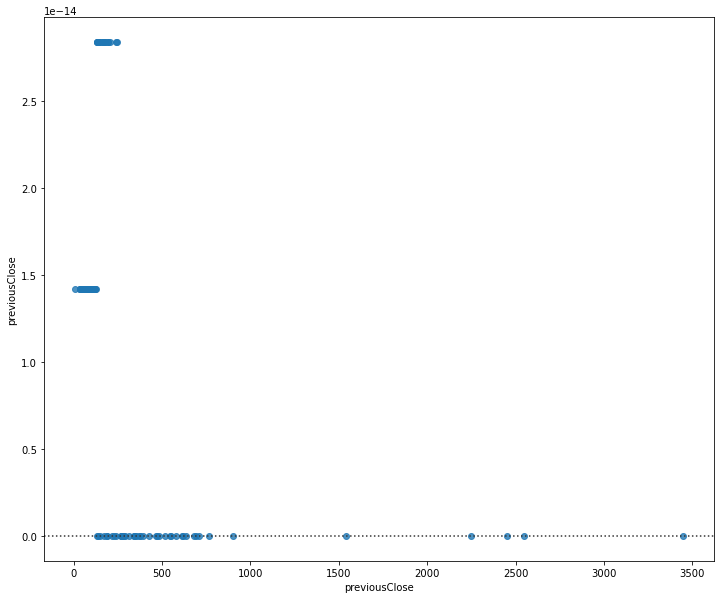

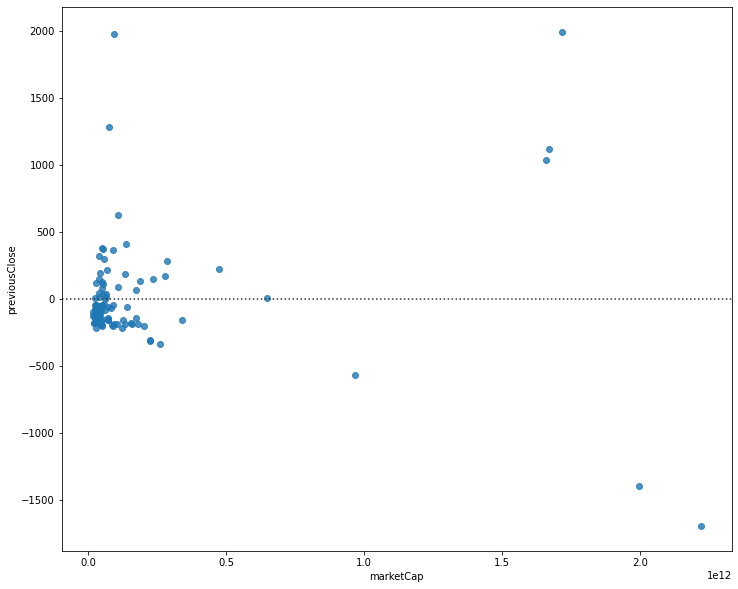

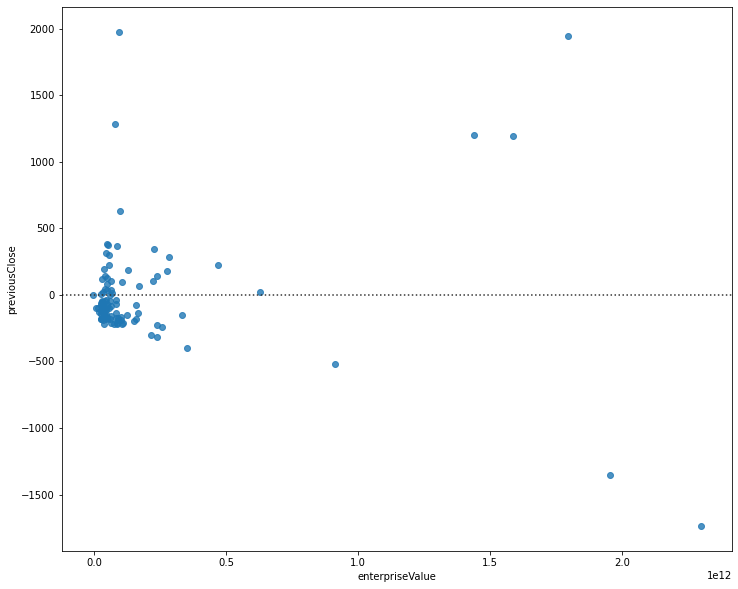

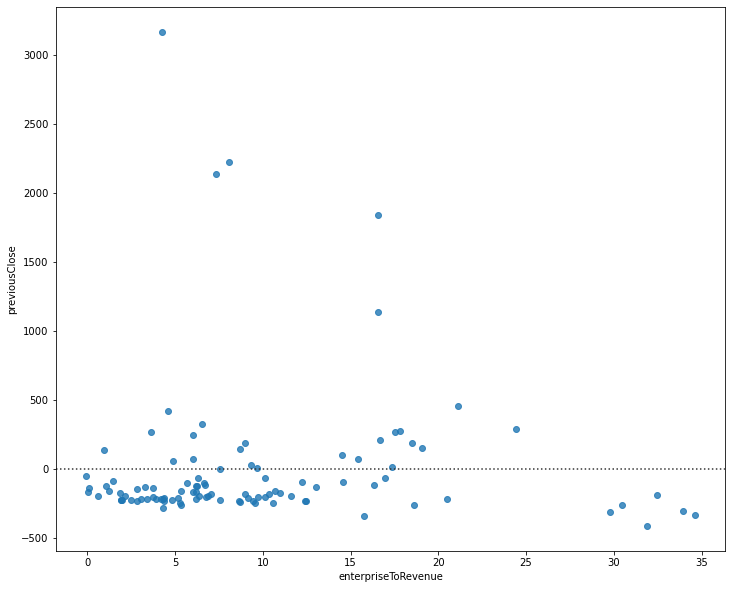

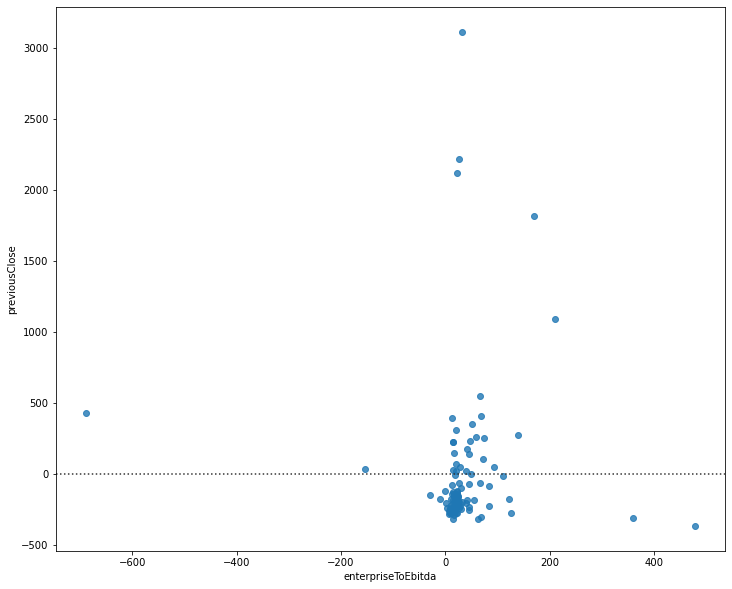

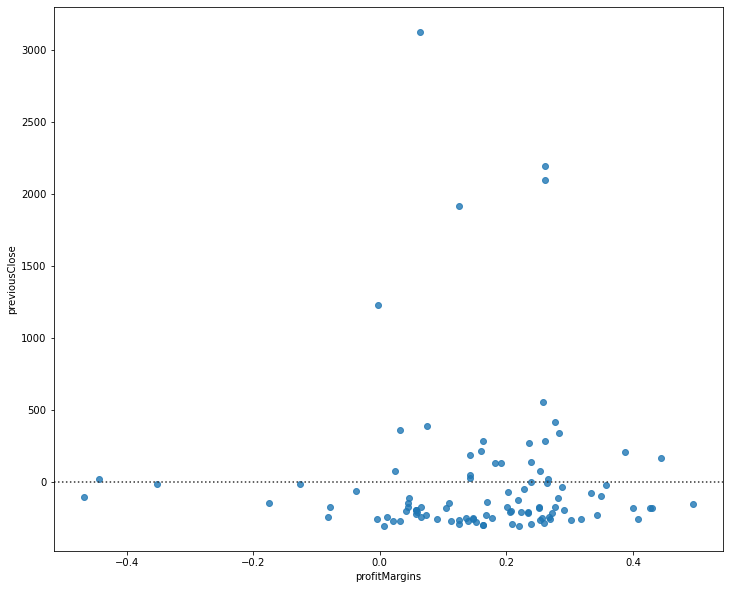

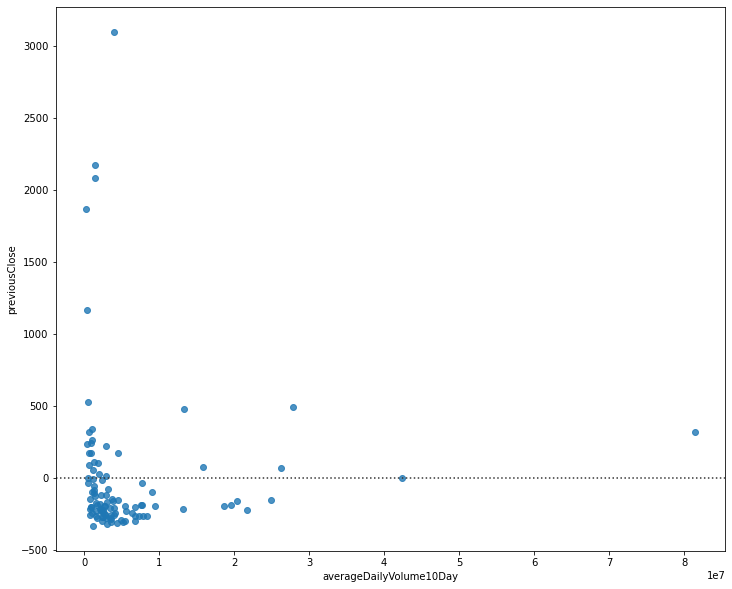

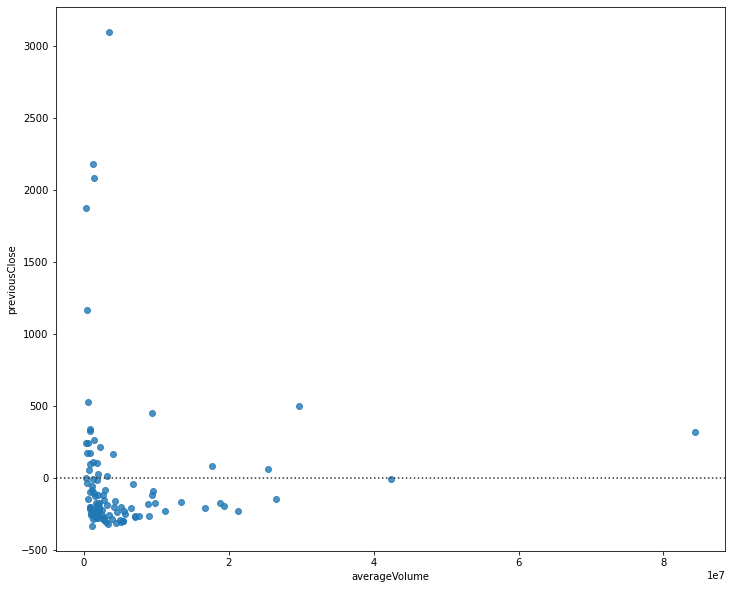

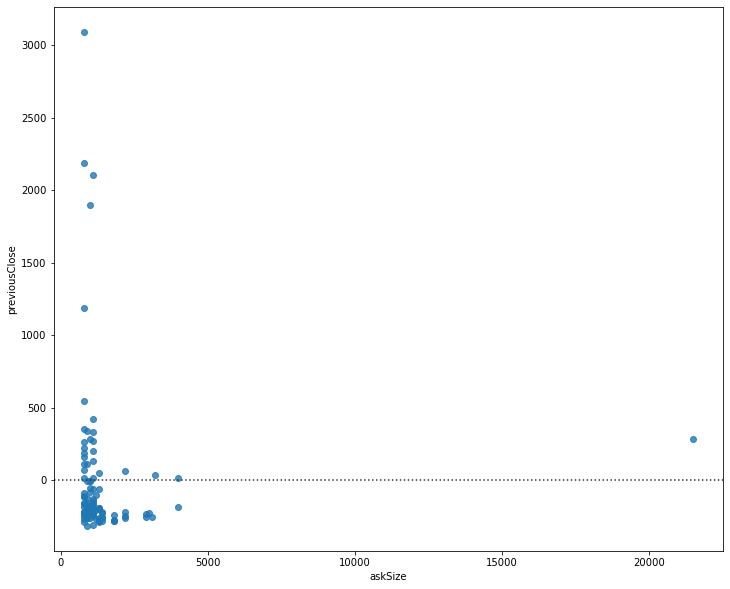

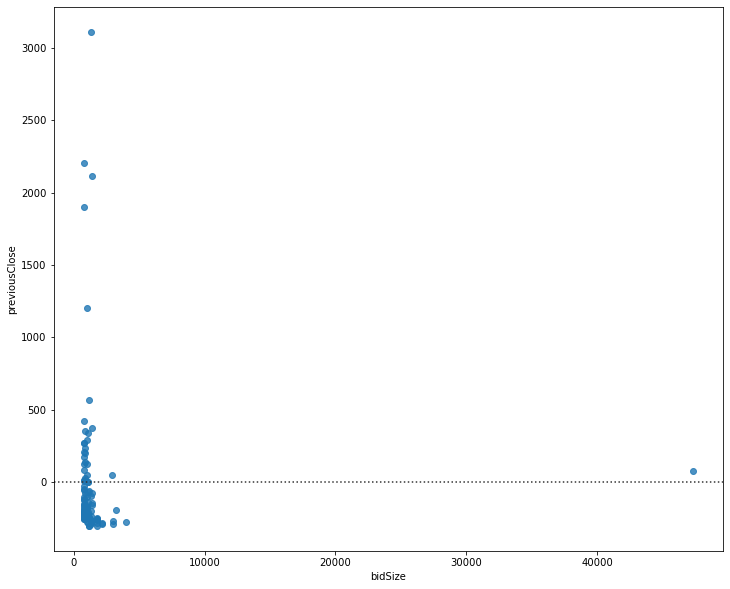

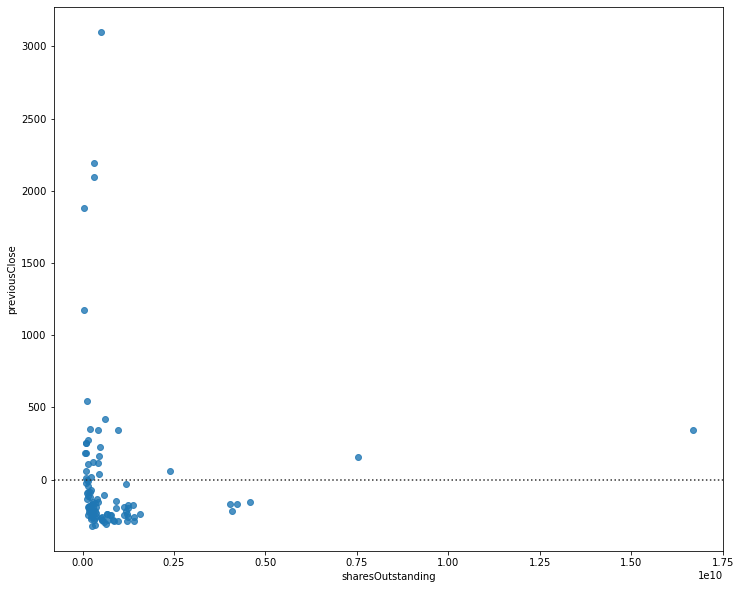

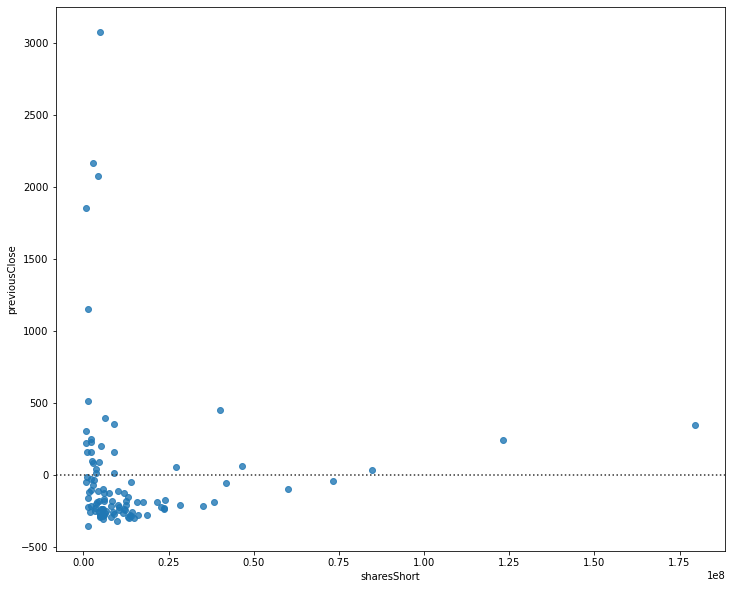

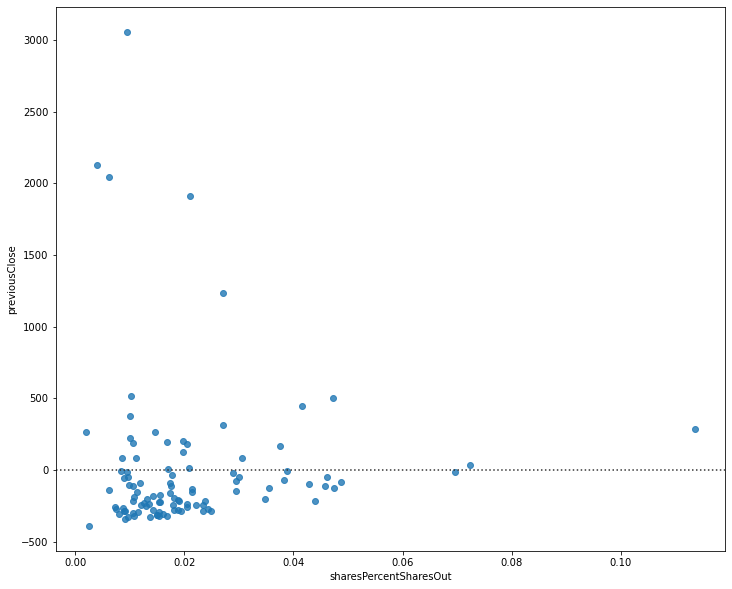

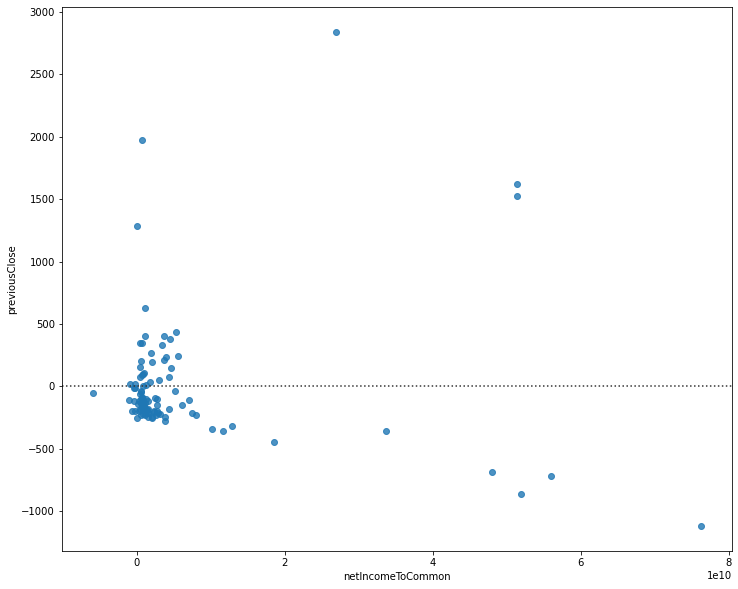

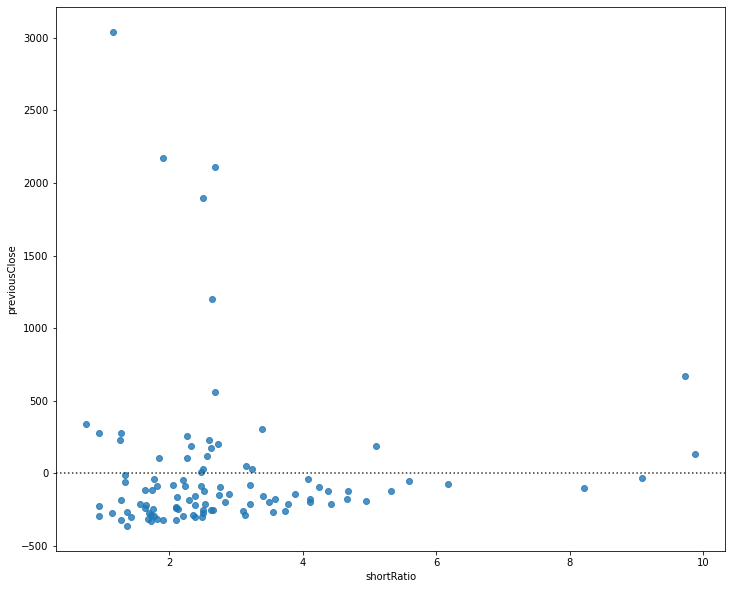

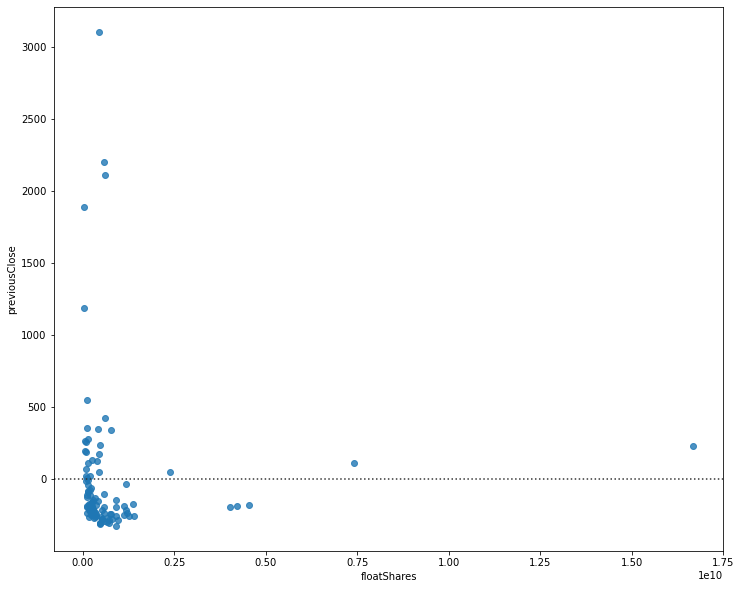

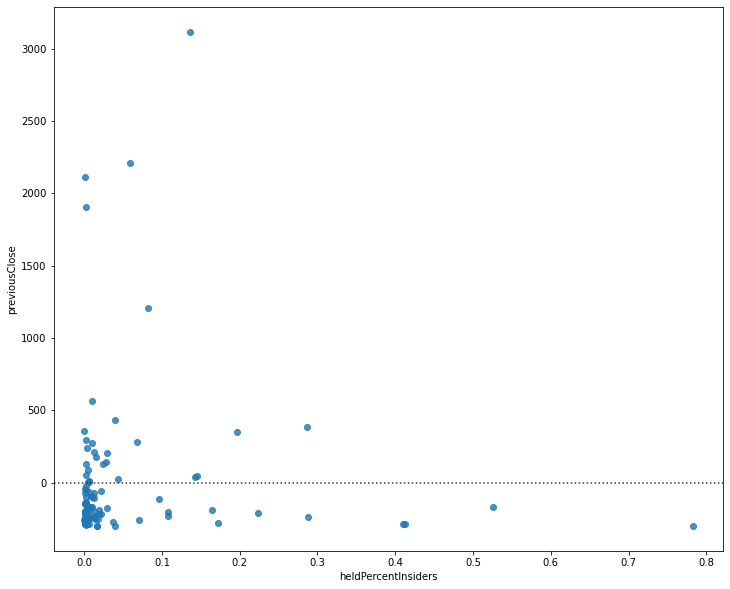

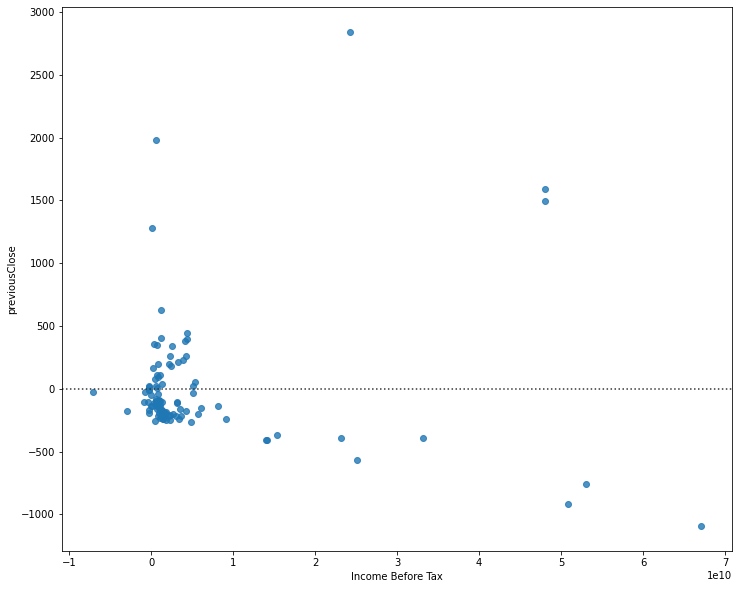

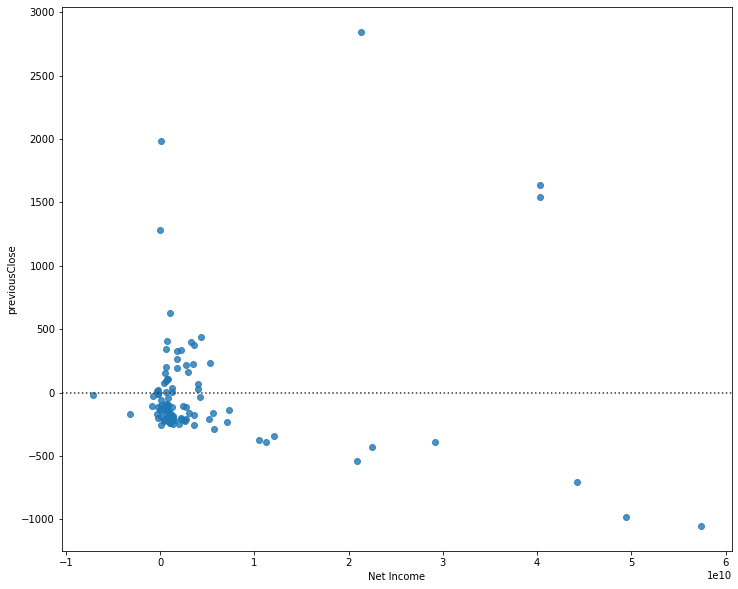

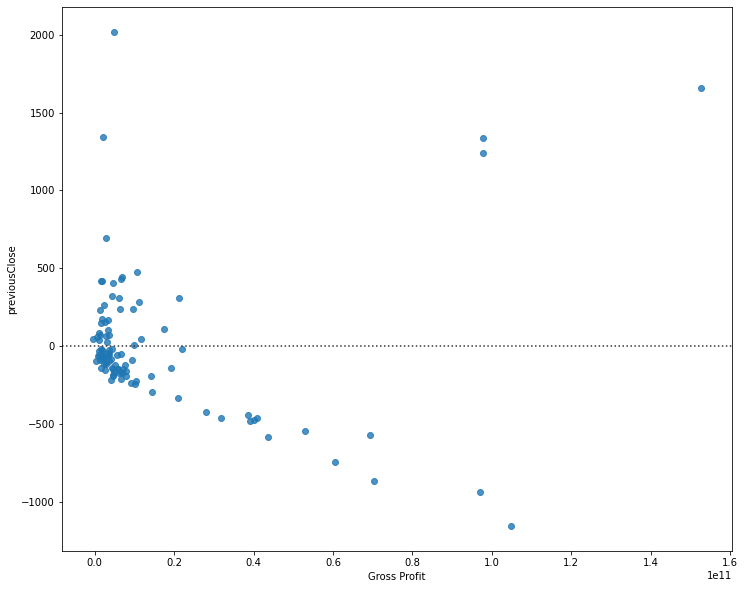

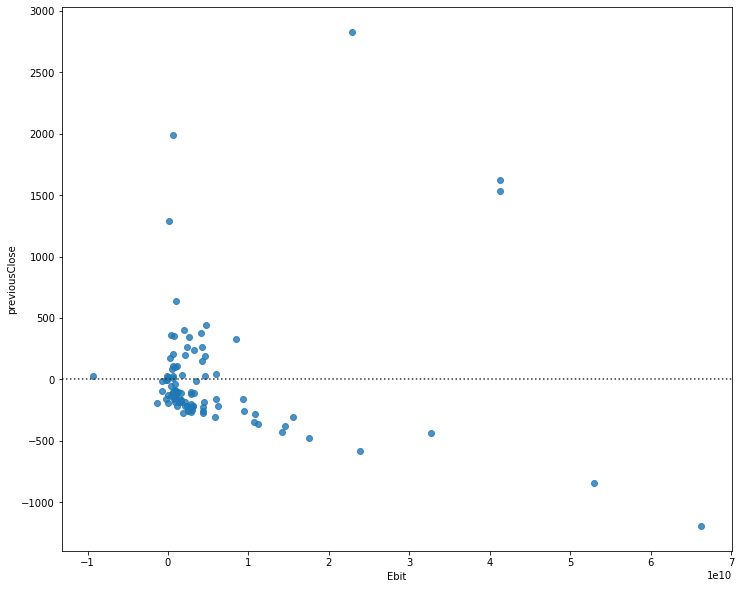

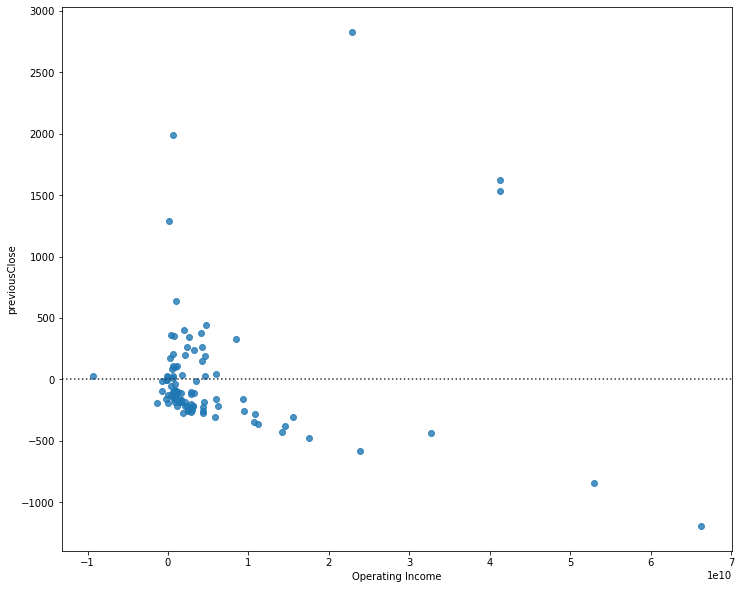

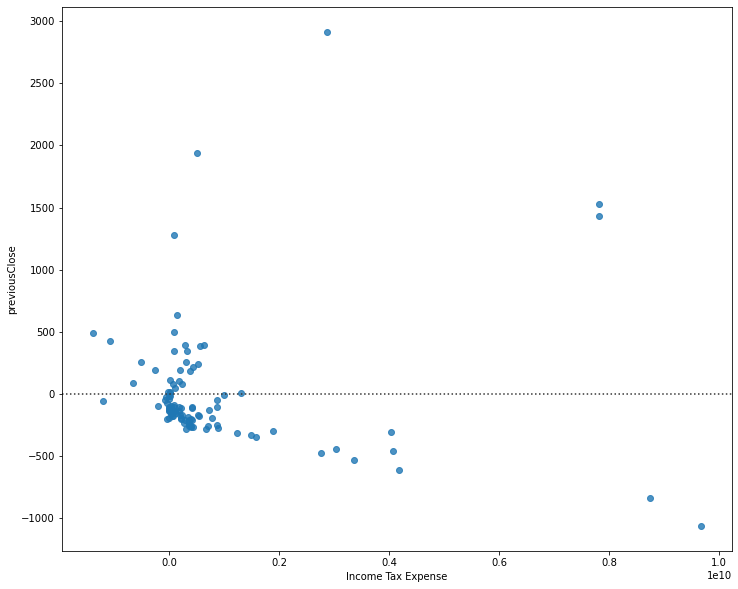

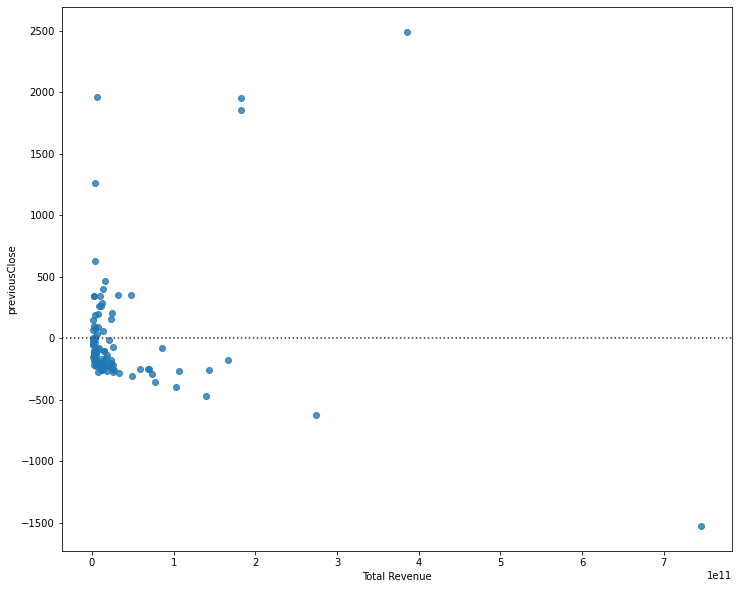

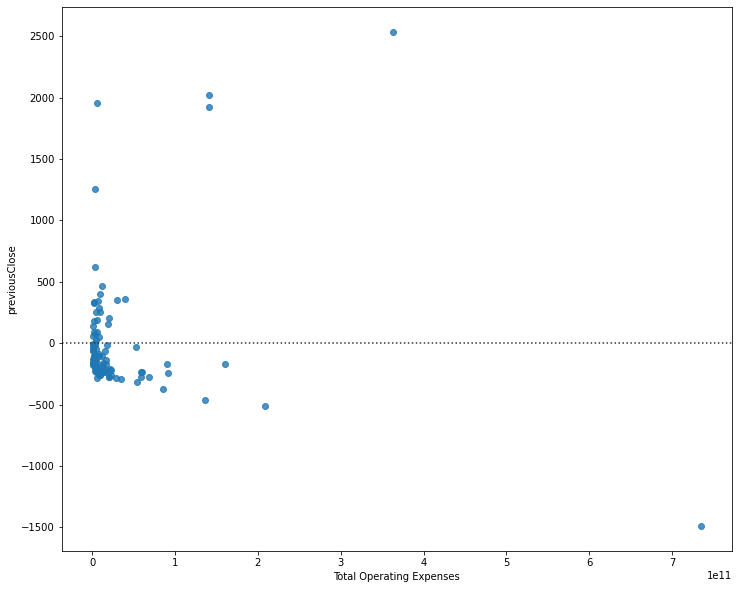

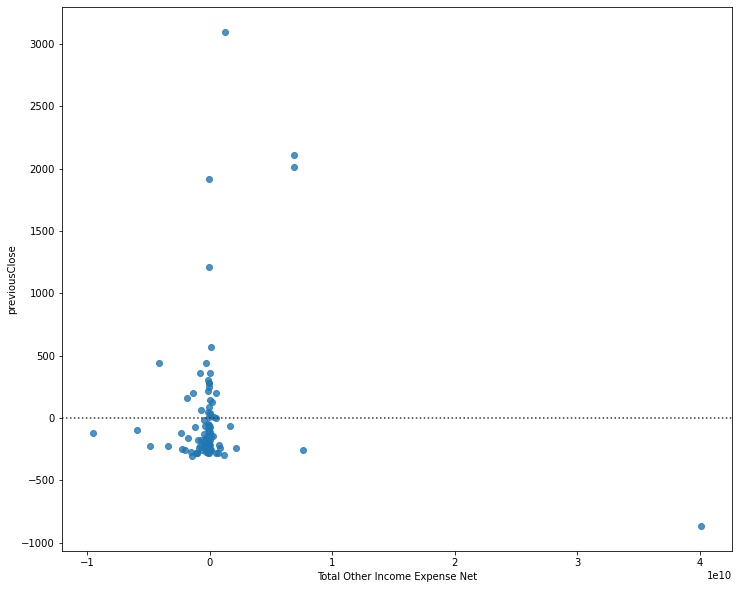

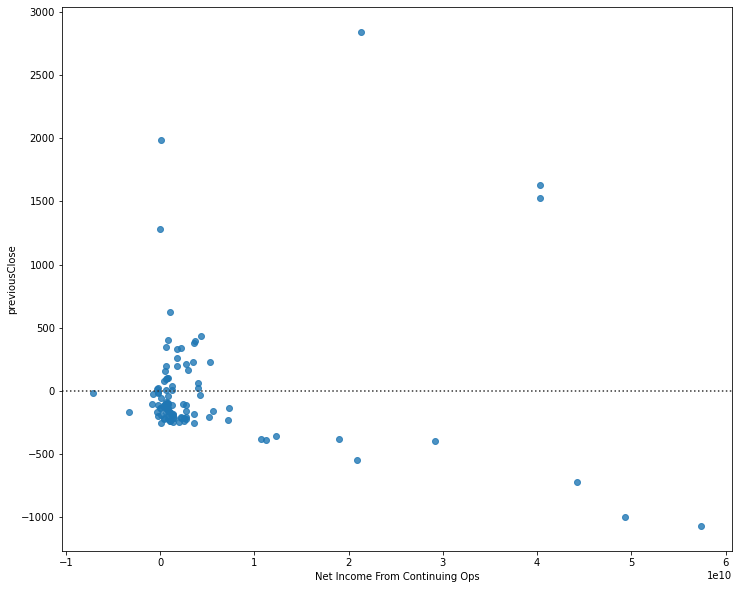

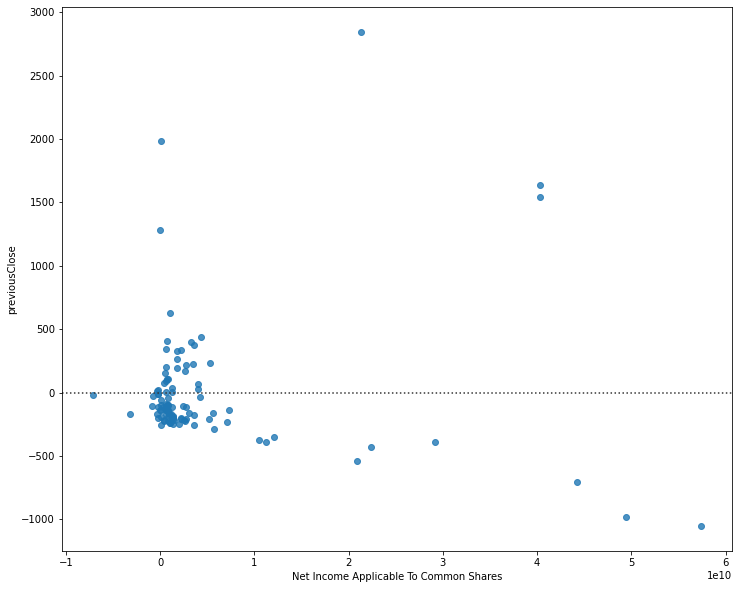

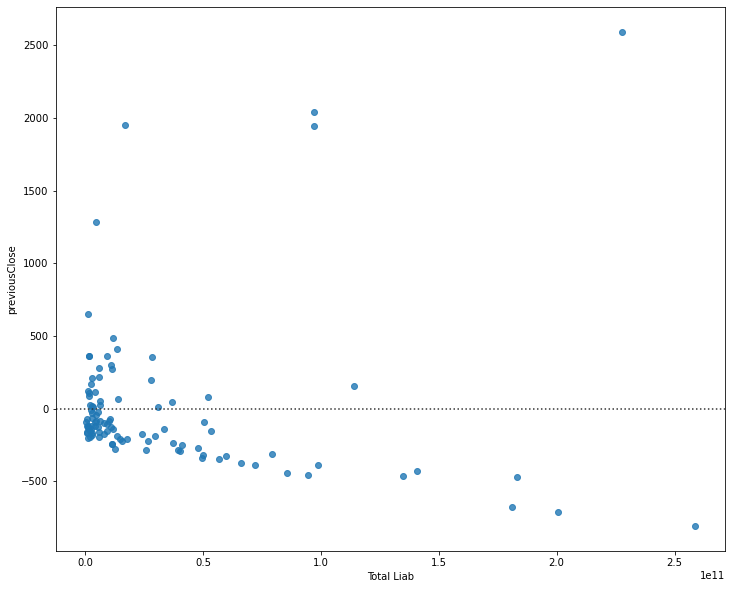

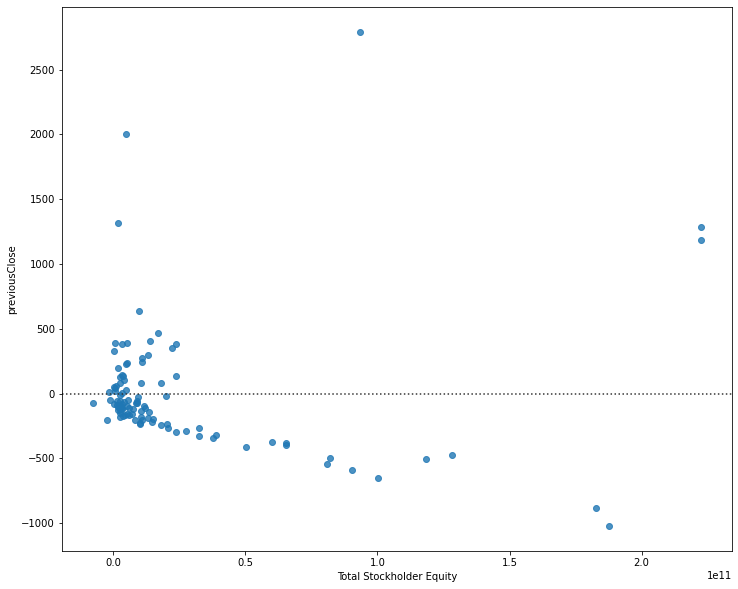

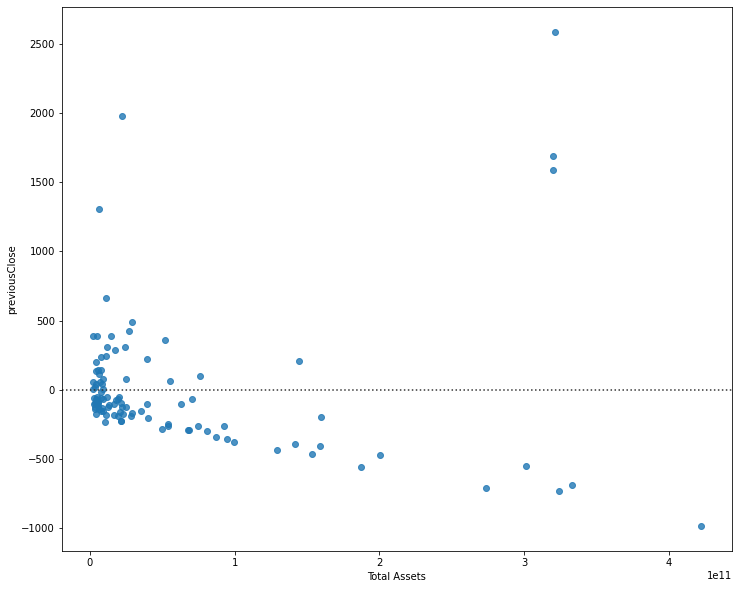

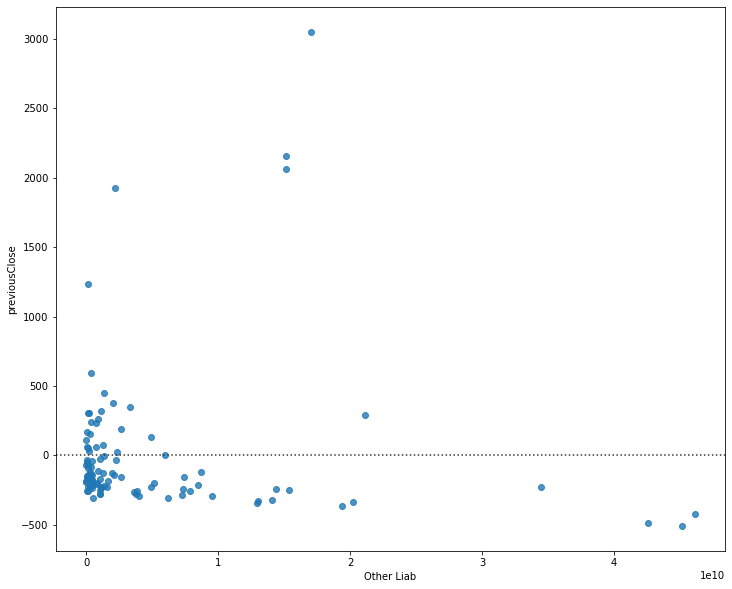

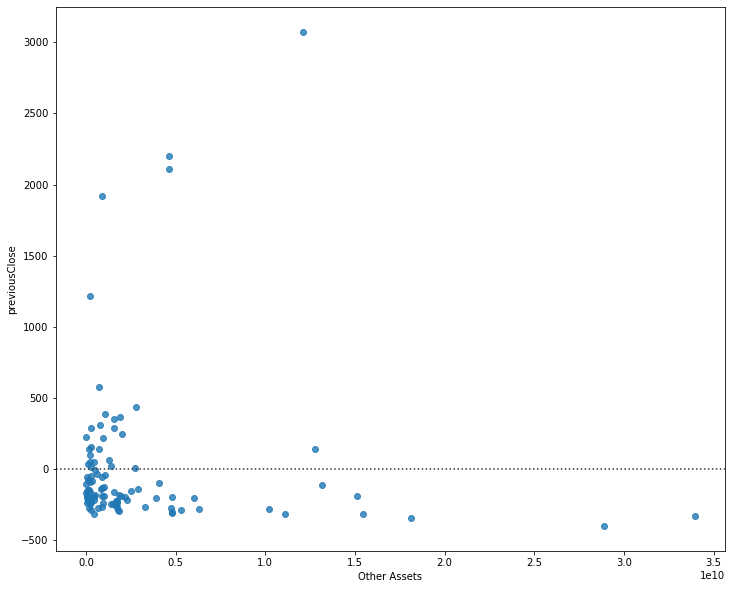

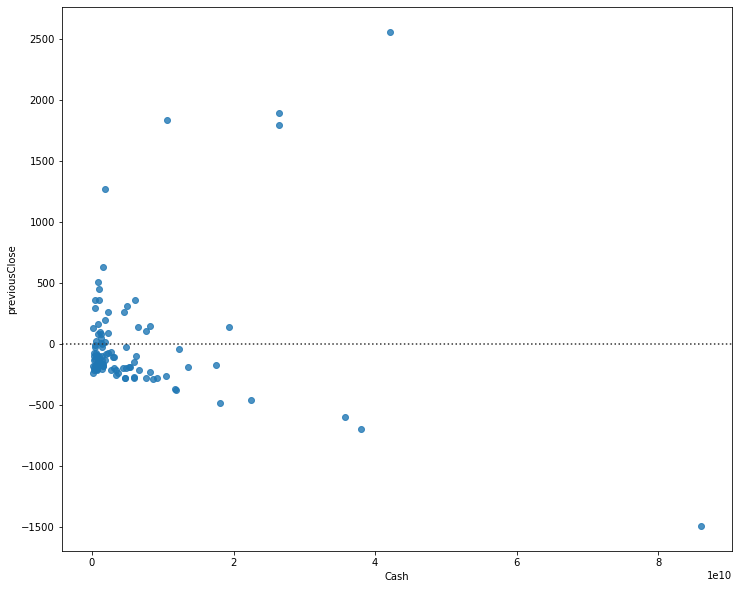

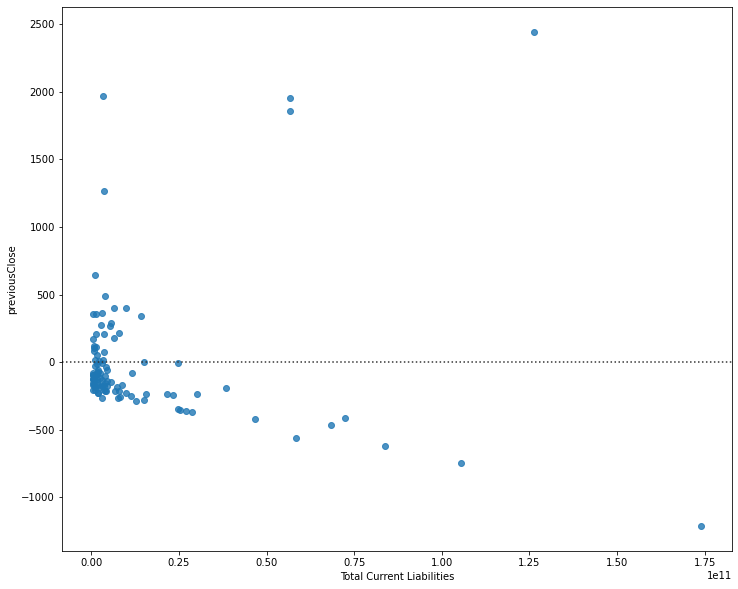

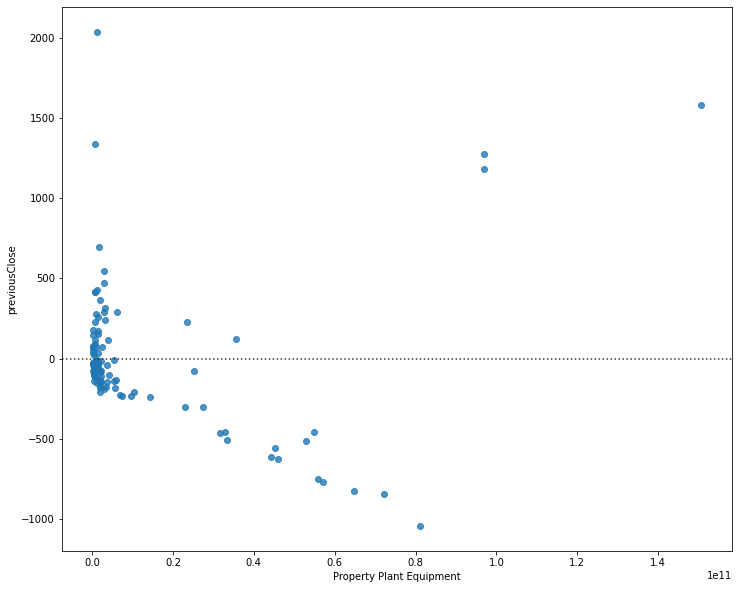

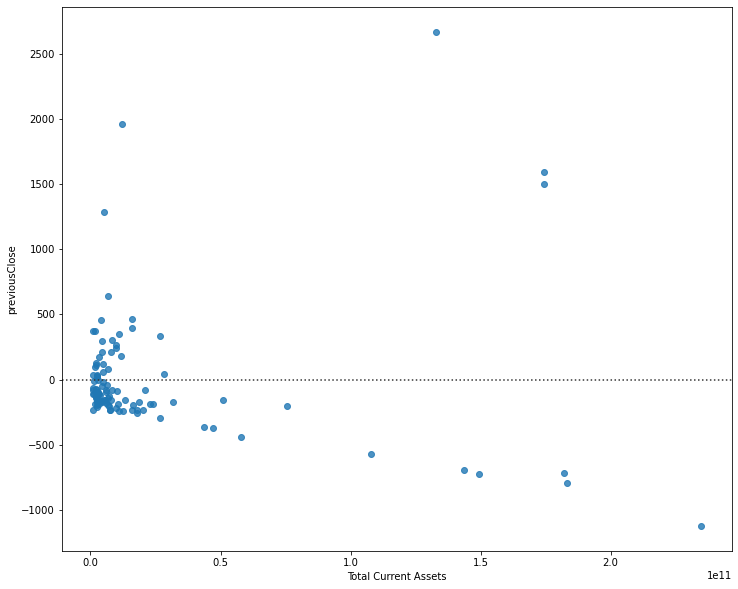

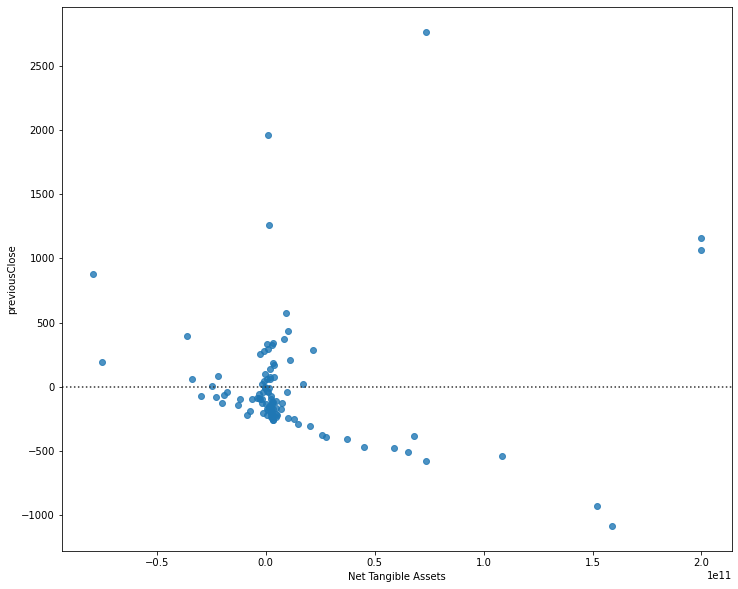

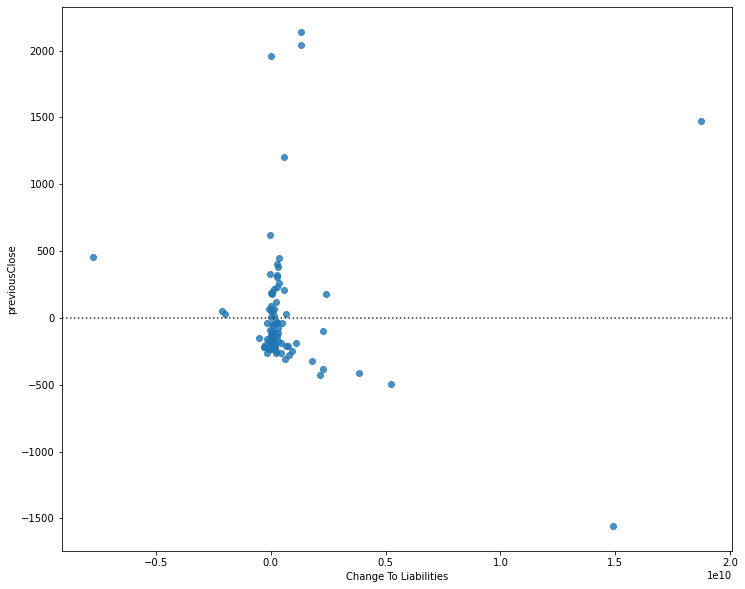

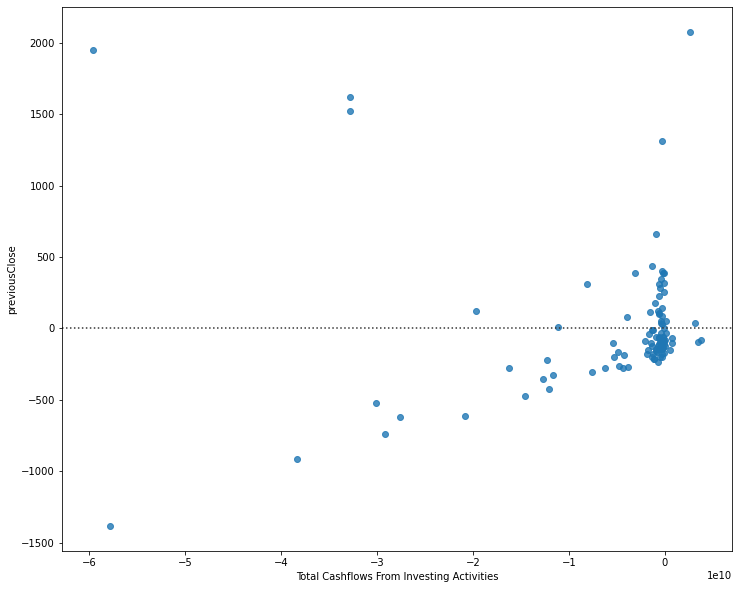

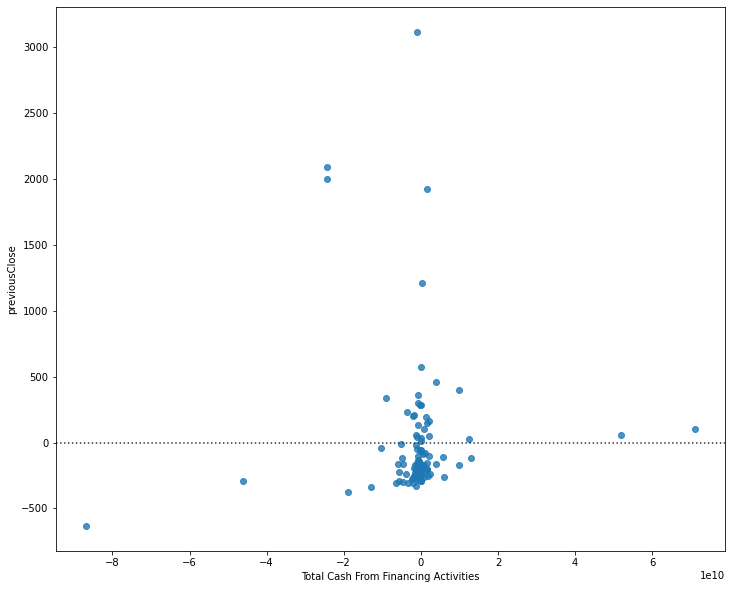

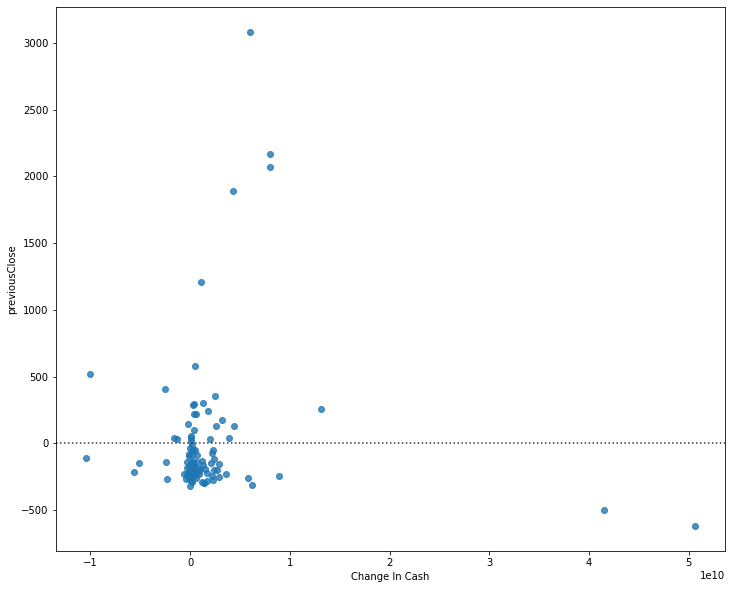

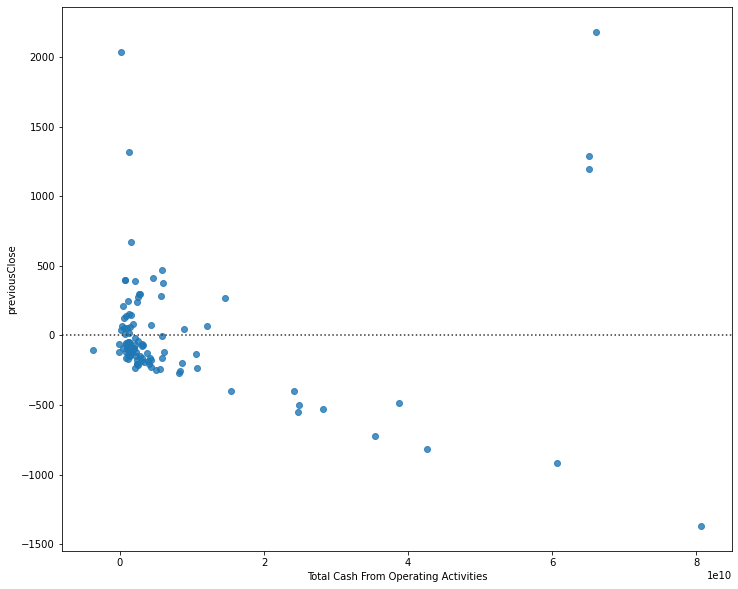

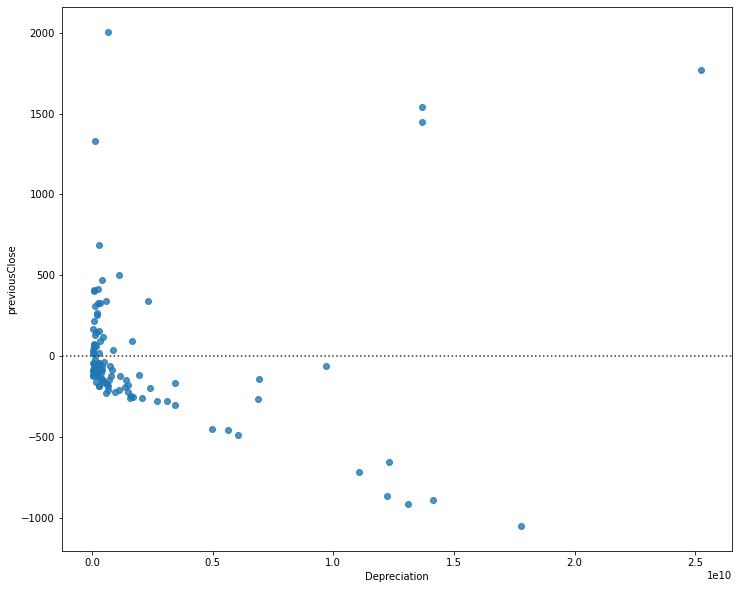

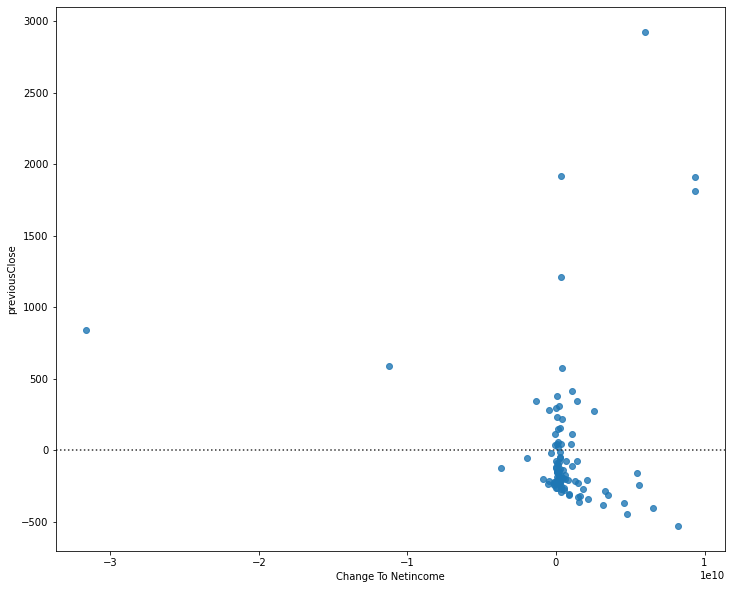

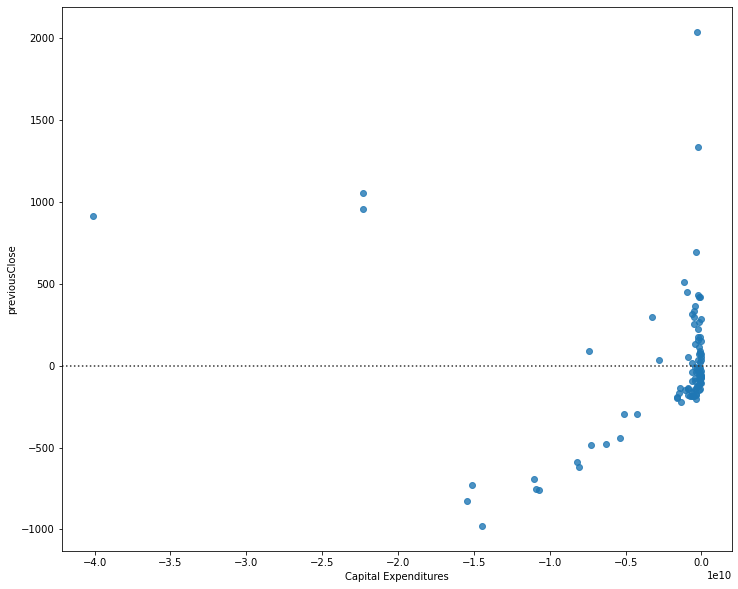

In [64]:
#find our whether linear model is appropriate for our data
for i in cleaned_data.columns:
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    sns.residplot(cleaned_data[i], cleaned_data['previousClose'])
    plt.show()

In [65]:
#since residual plot seems to show that there is an outlier problem, let's remove outliers
z_scores = stats.zscore(cleaned_data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_cleaned_data = cleaned_data[filtered_entries]

print(new_cleaned_data)

        previousClose     marketCap  enterpriseValue  enterpriseToRevenue  \
symbol                                                                      
ATVI            92.51  7.168759e+10     6.464335e+10                7.540   
ADBE           578.26  2.770775e+11     2.741287e+11               19.051   
ALXN           180.72  4.038901e+10     3.917199e+10                6.256   
ALGN           617.39  4.866742e+10     4.689618e+10               16.655   
AEP             82.85  4.236381e+10     8.026294e+10                5.194   
AMGN           240.95  1.394328e+11     1.592708e+11                6.329   
ANSS           341.55  2.993483e+10     2.948714e+10               16.951   
AMAT           138.26  1.244751e+11     1.227824e+11                6.193   
ASML           695.00  2.858161e+11     2.833546e+11               17.819   
ADSK           286.96  6.352655e+10     6.357918e+10               16.327   
ADP            196.08  8.398024e+10     8.362454e+10                5.710   

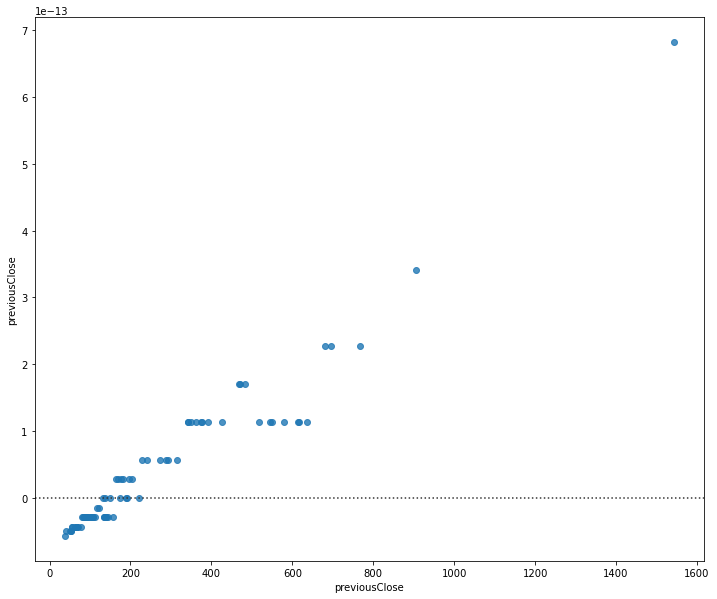

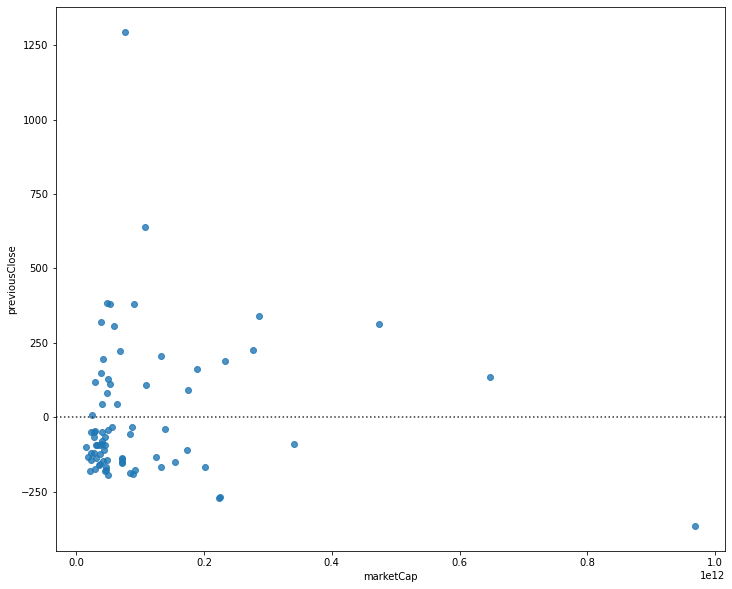

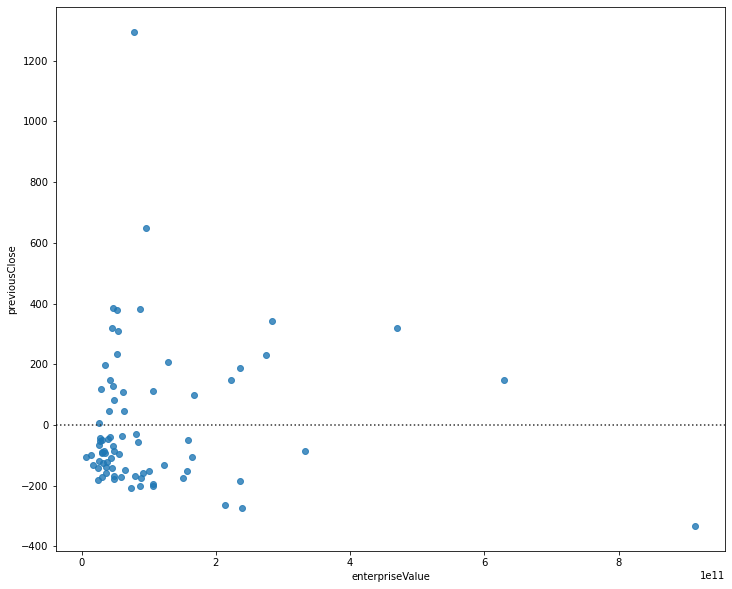

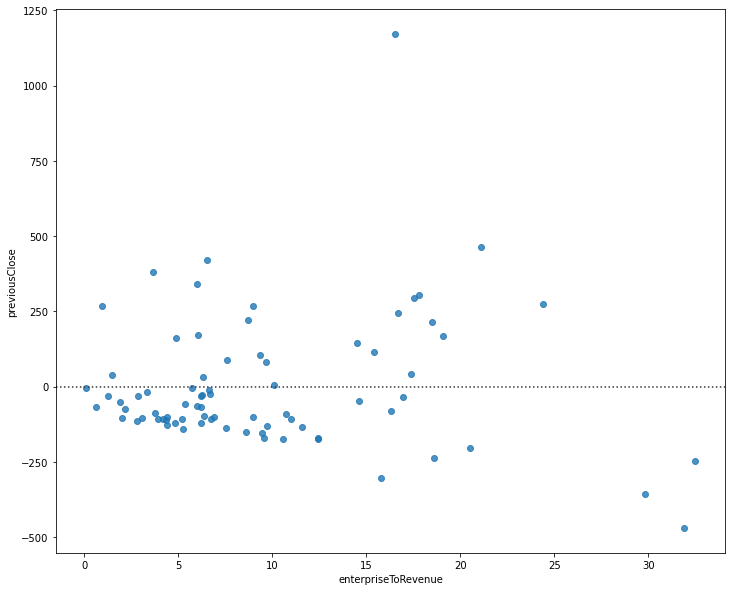

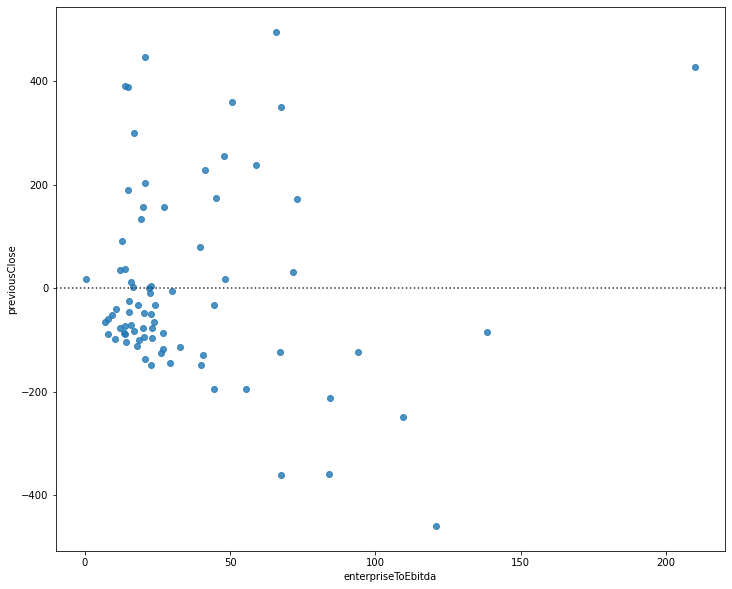

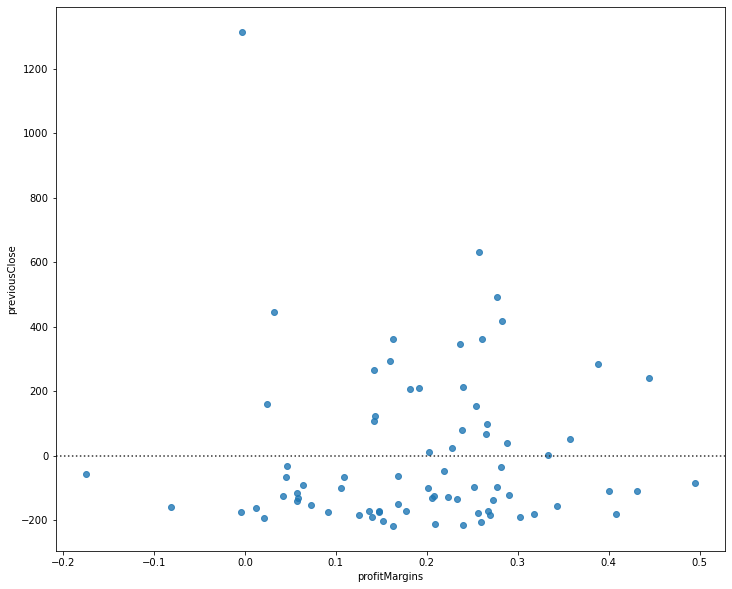

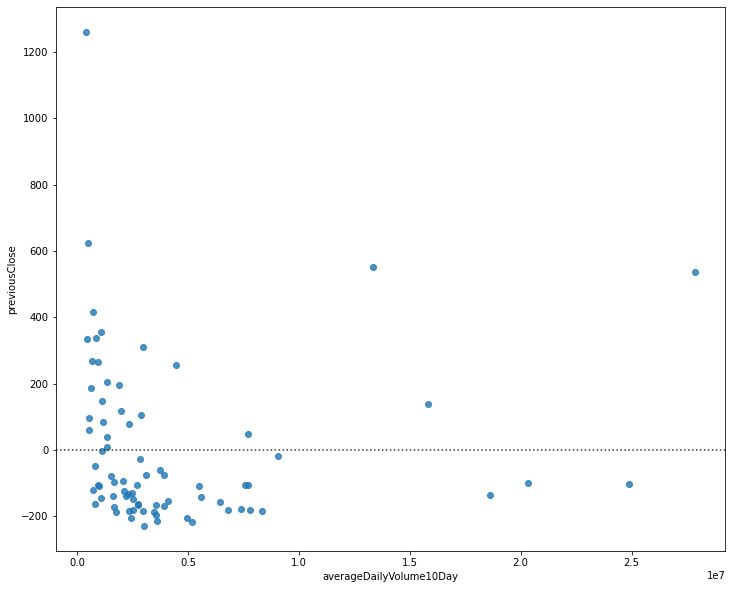

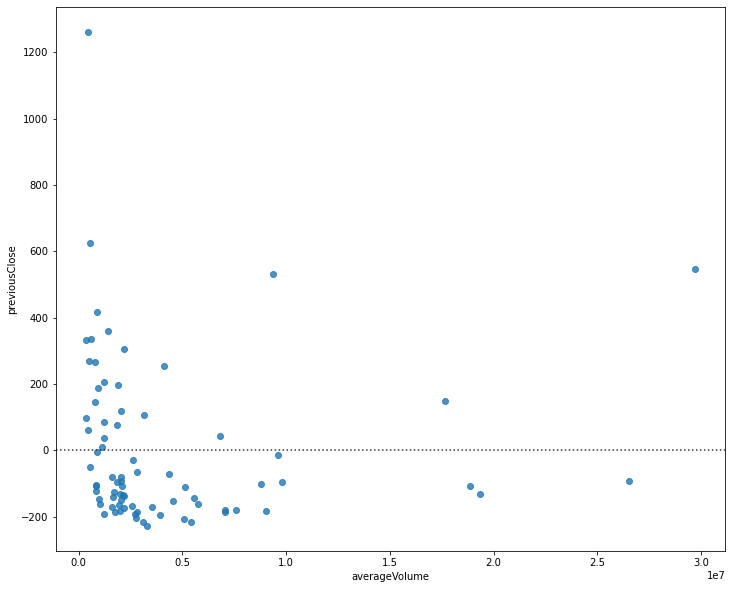

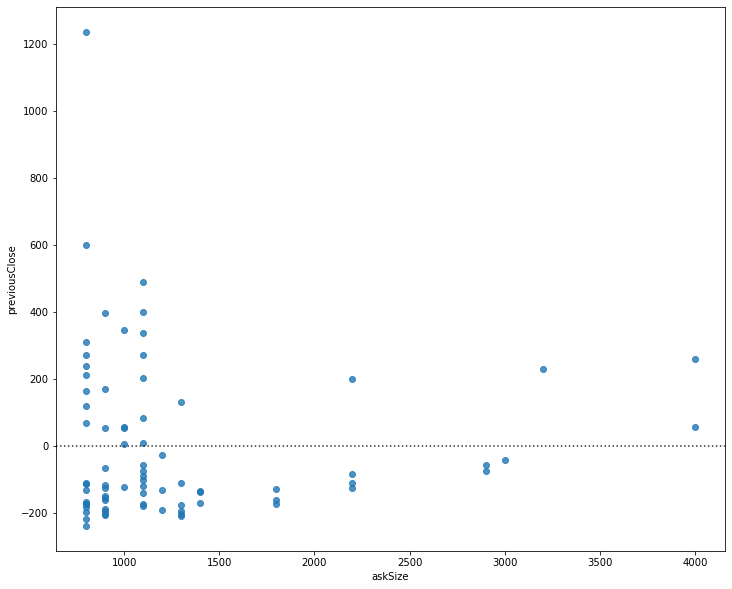

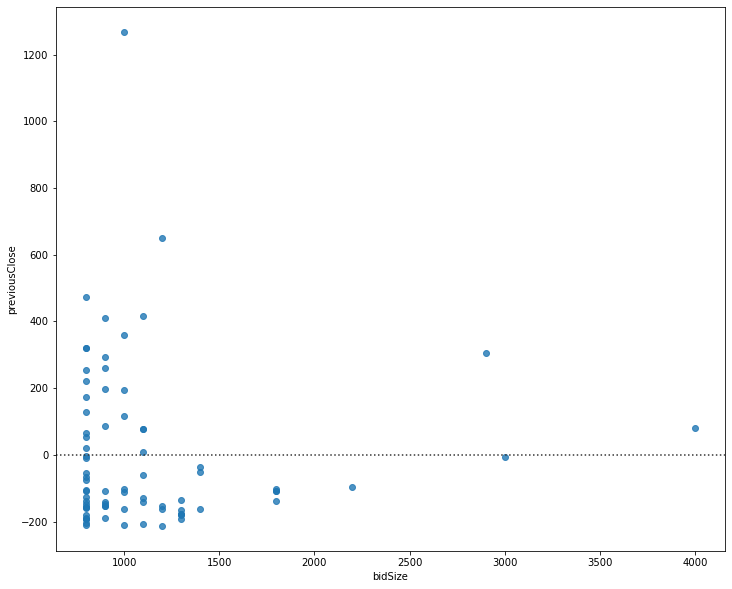

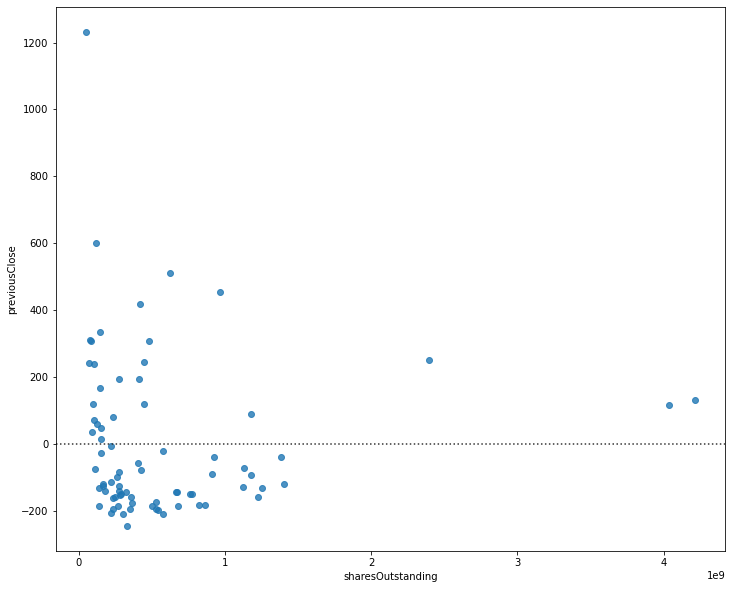

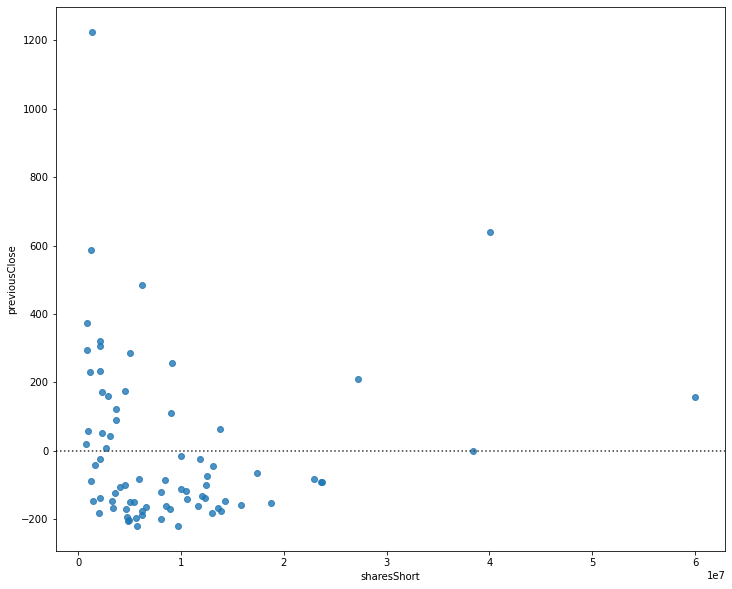

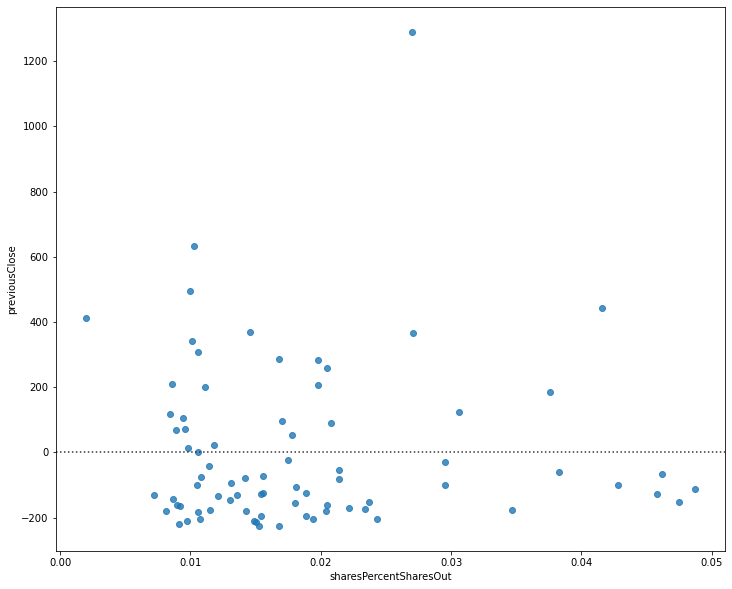

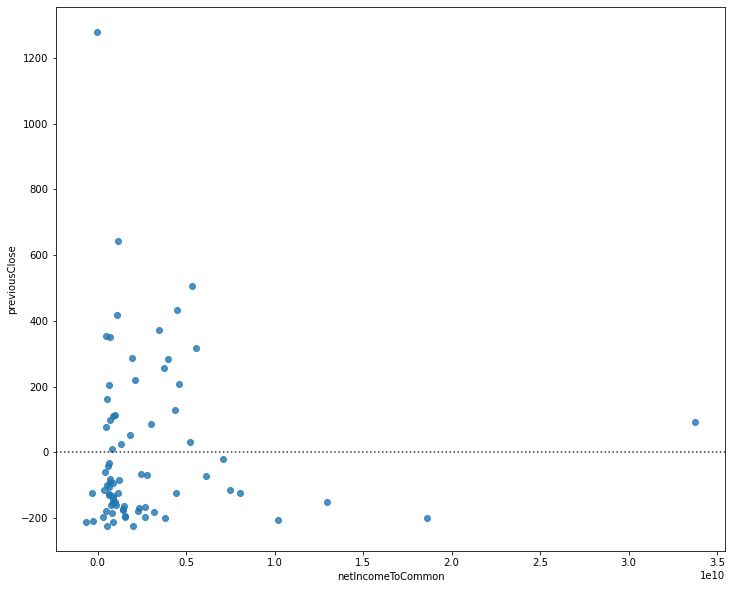

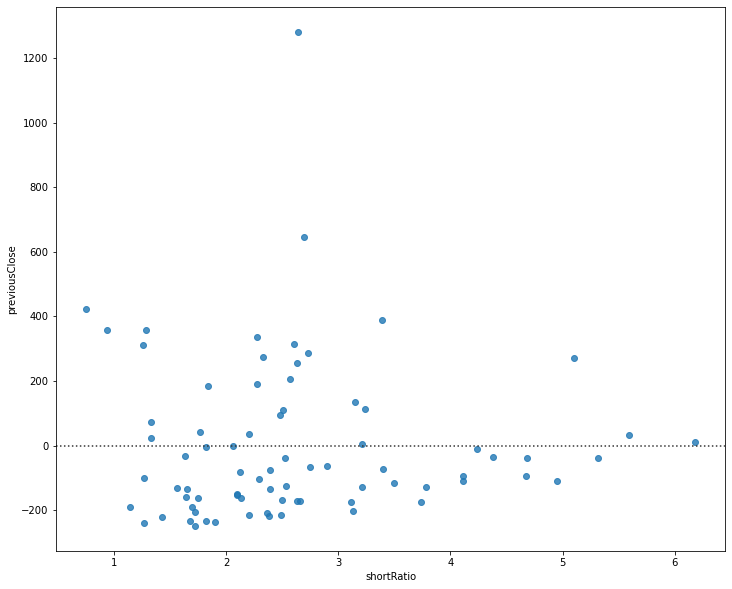

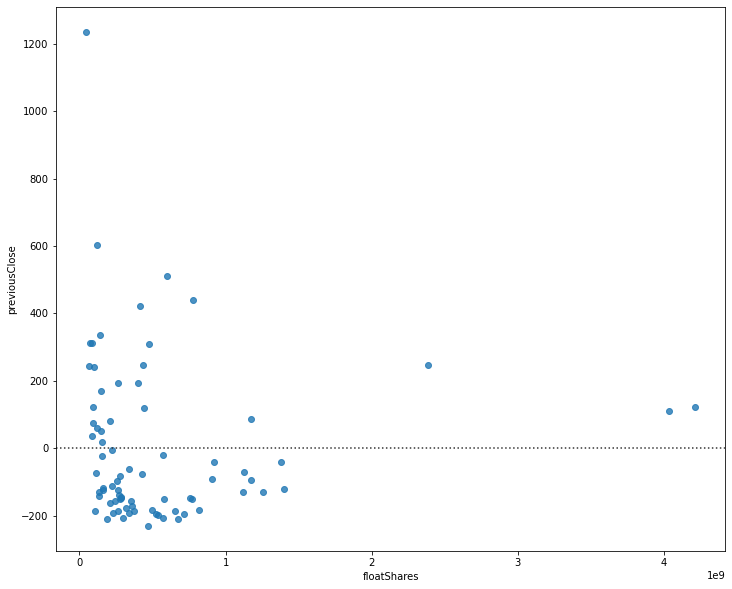

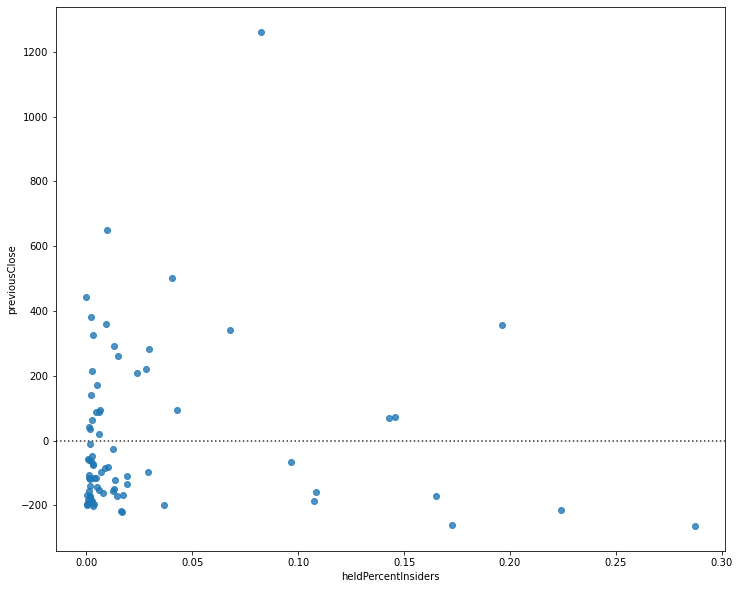

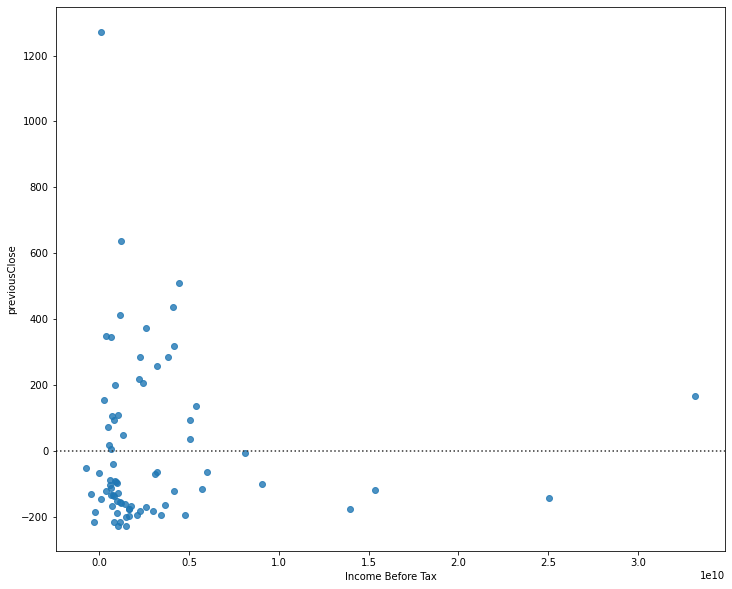

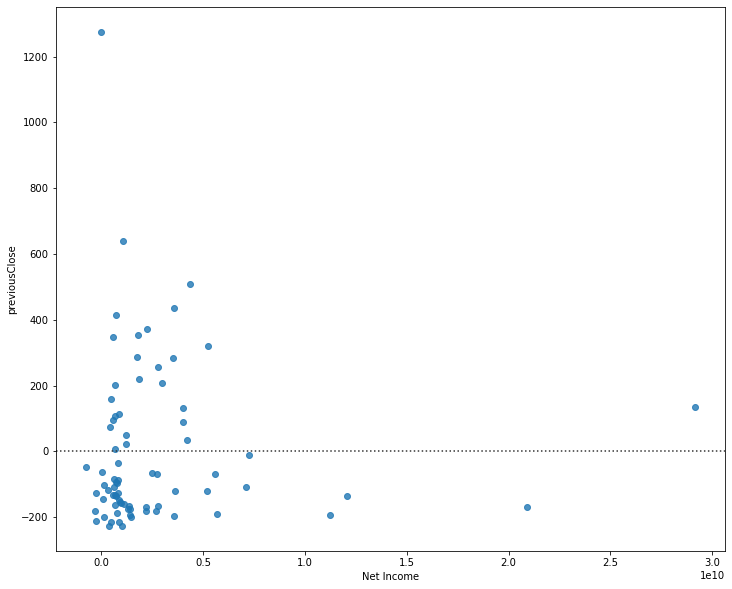

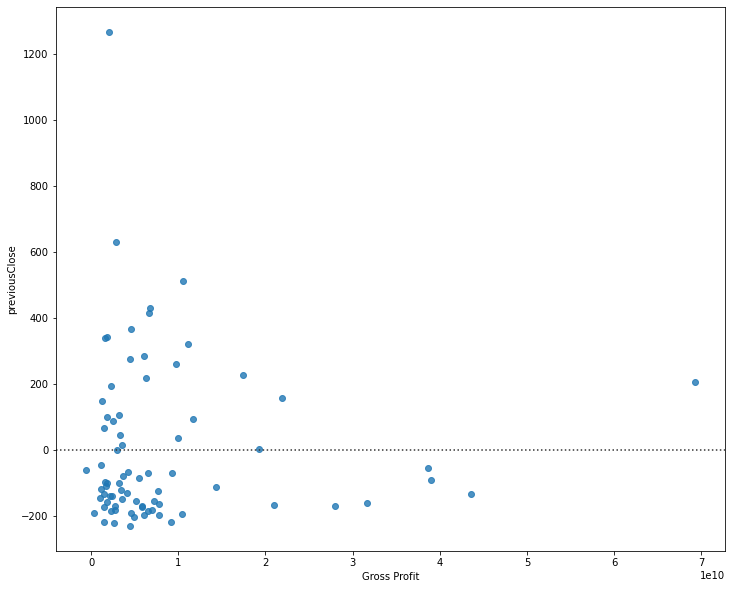

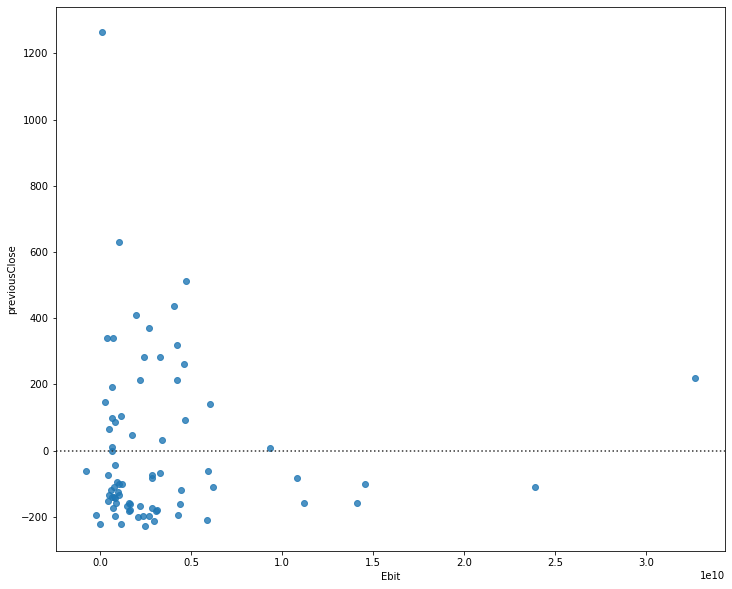

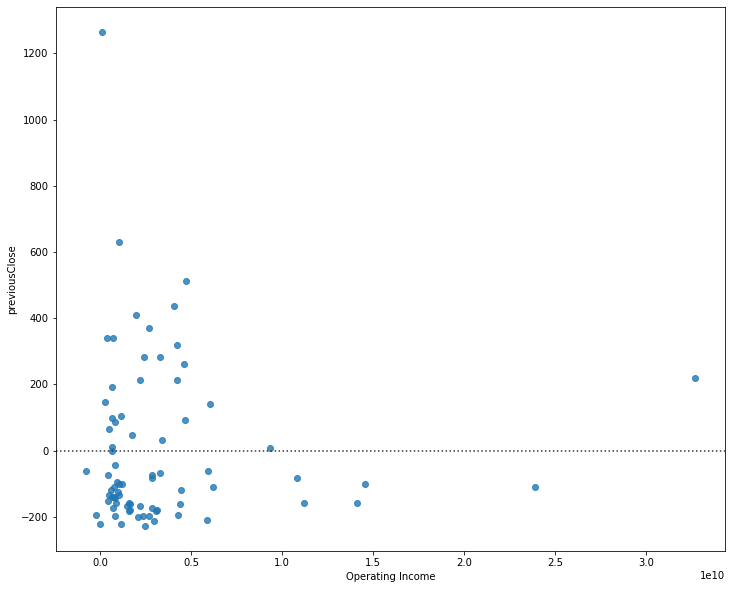

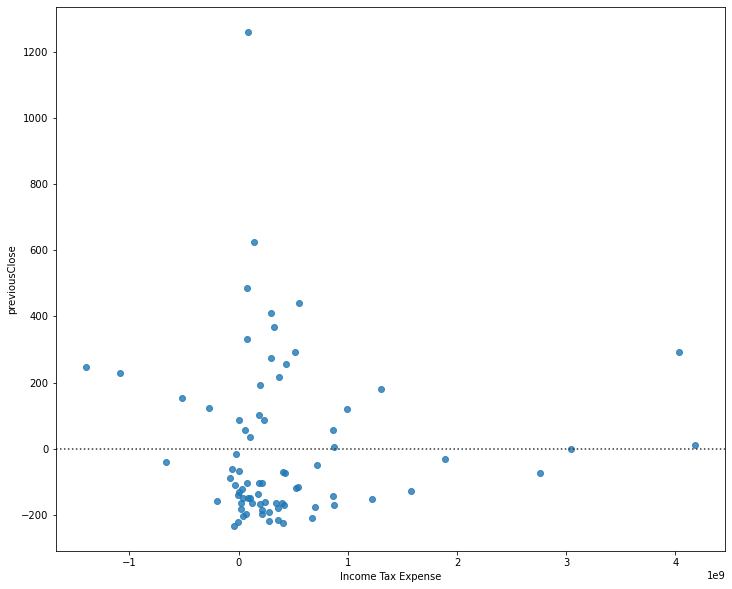

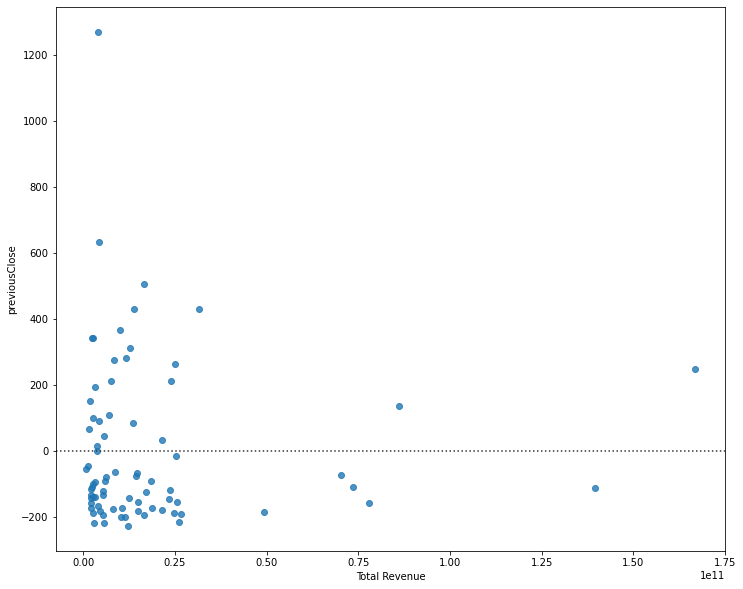

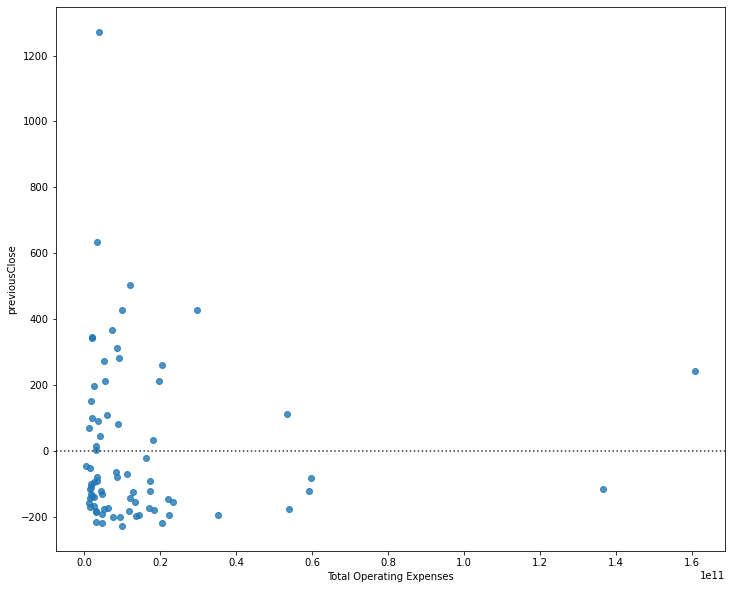

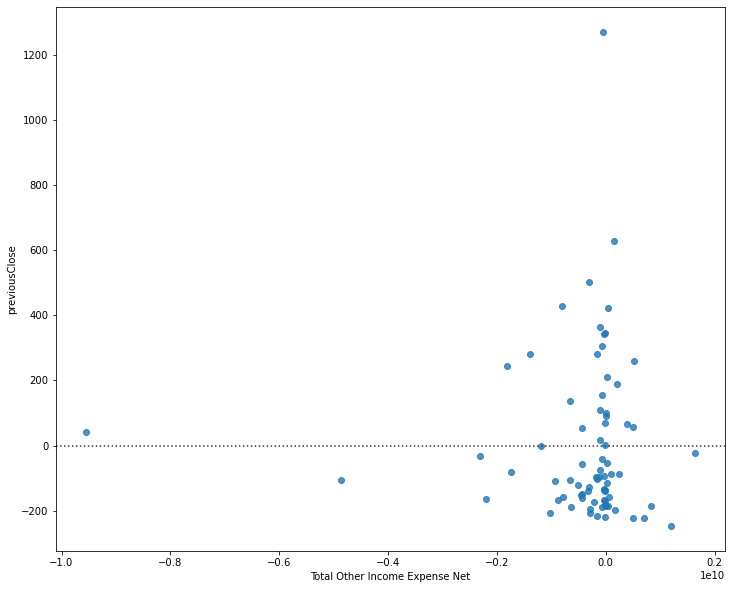

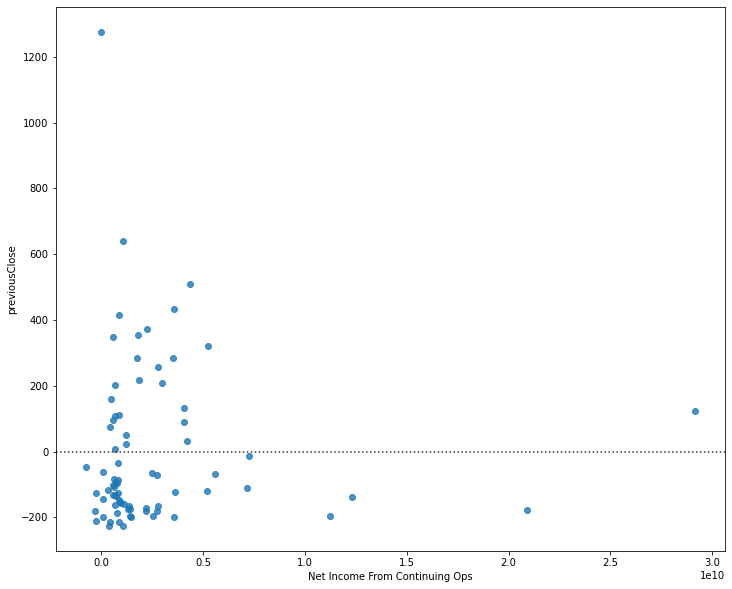

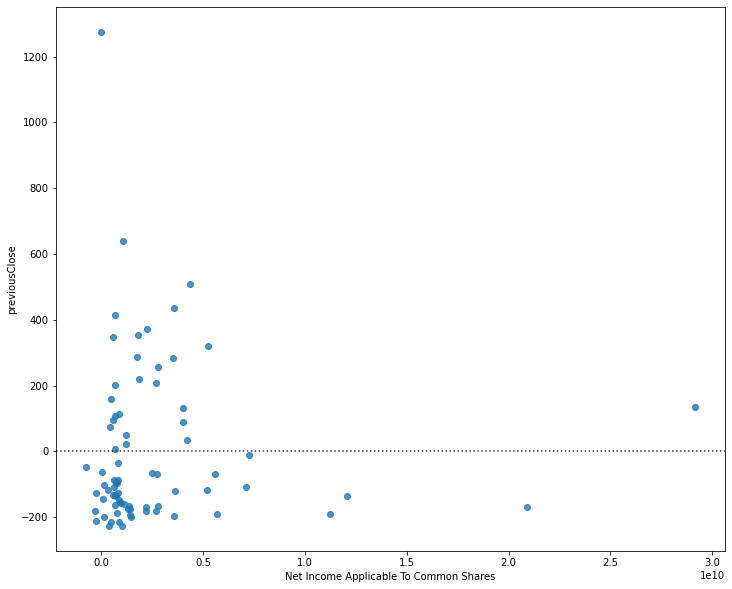

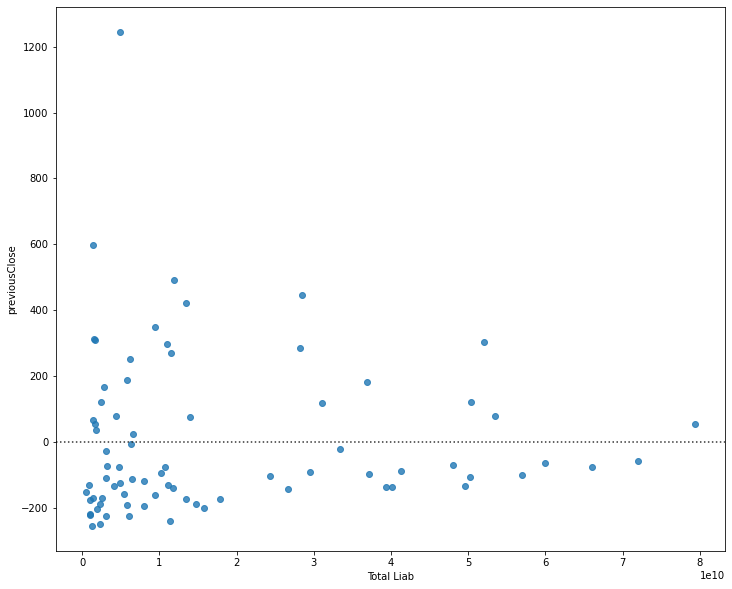

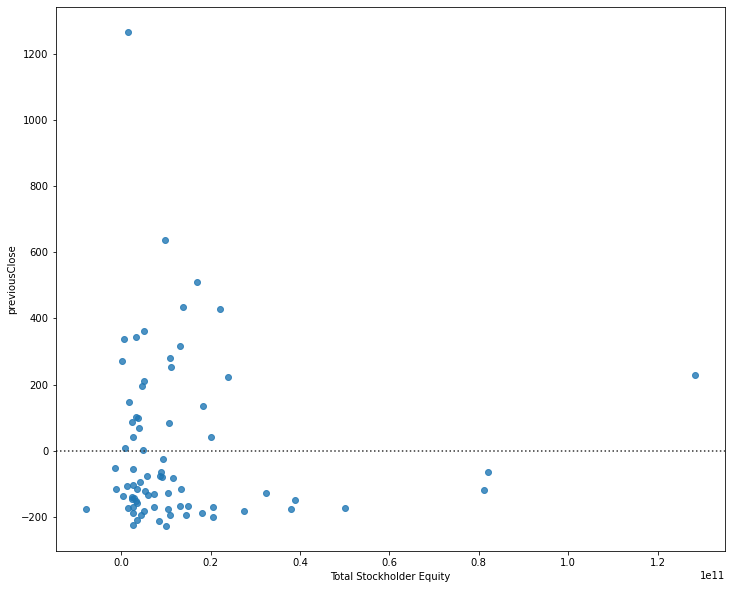

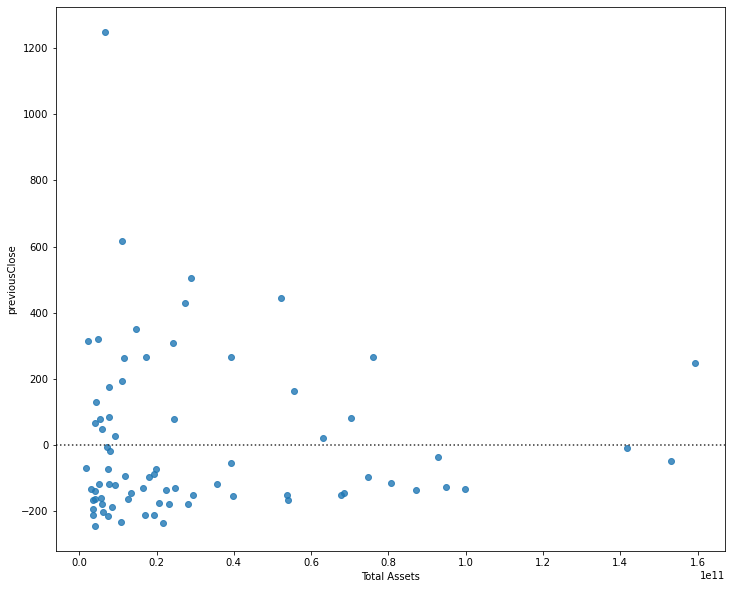

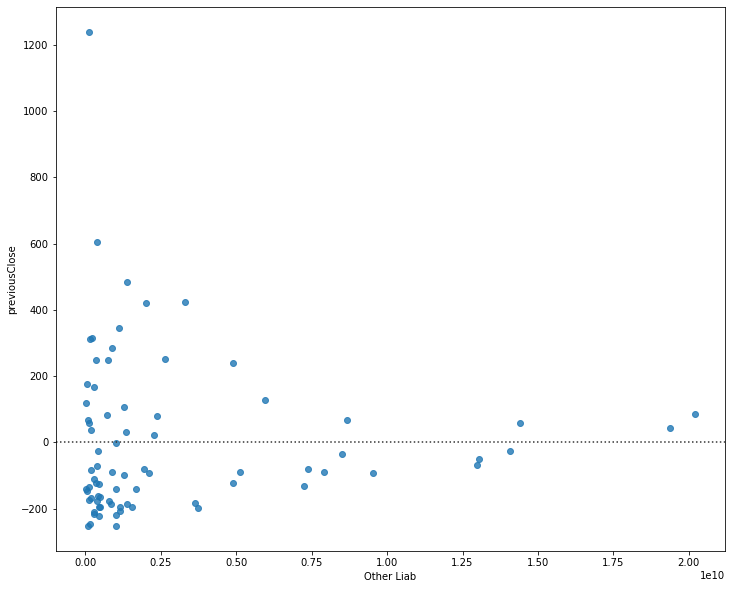

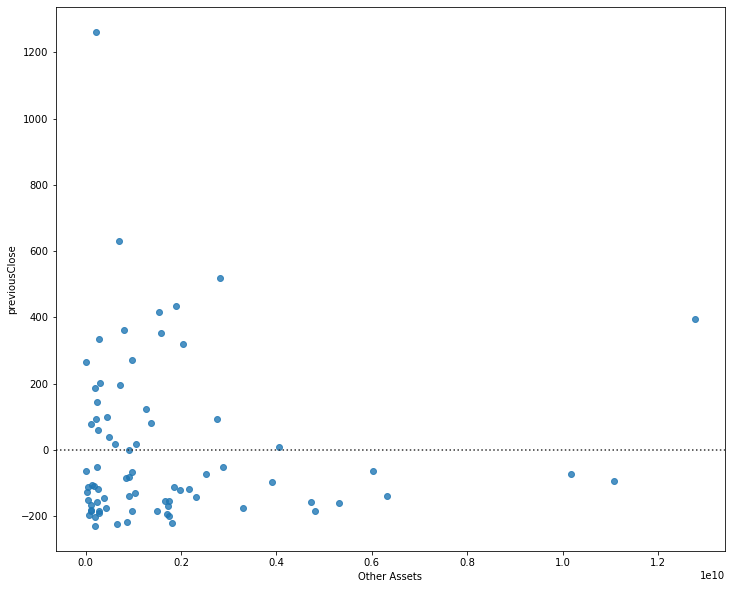

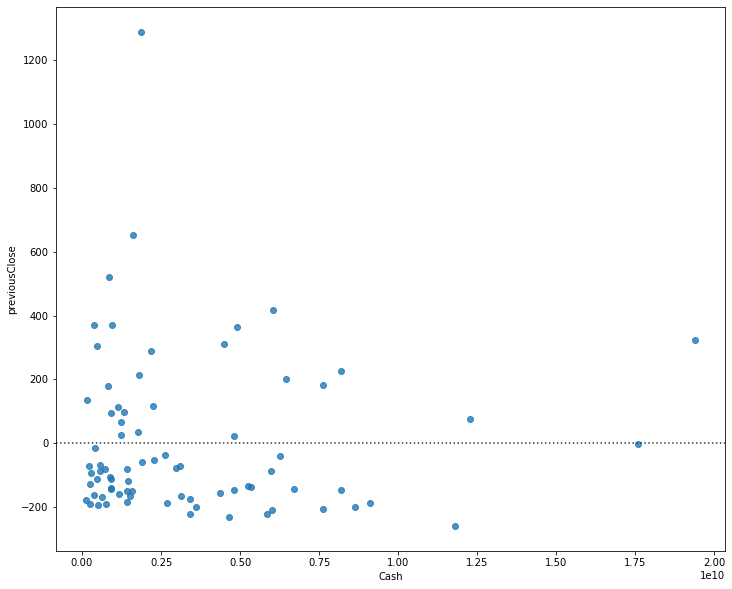

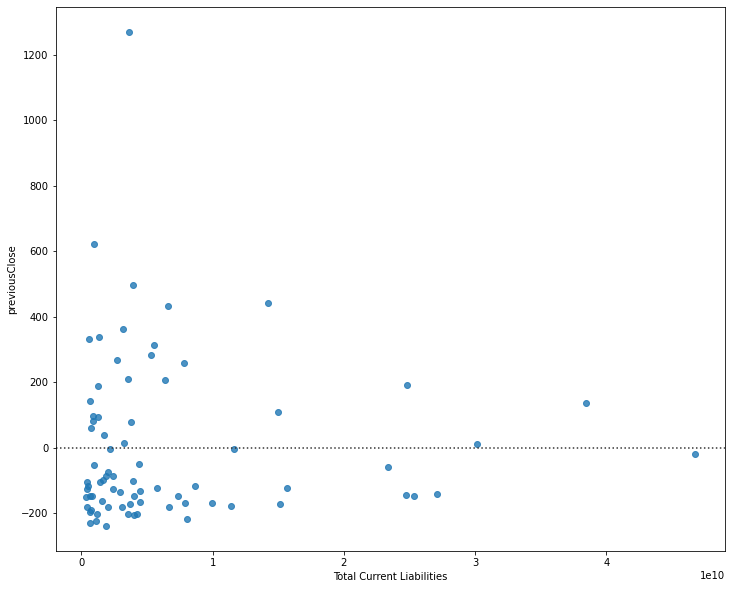

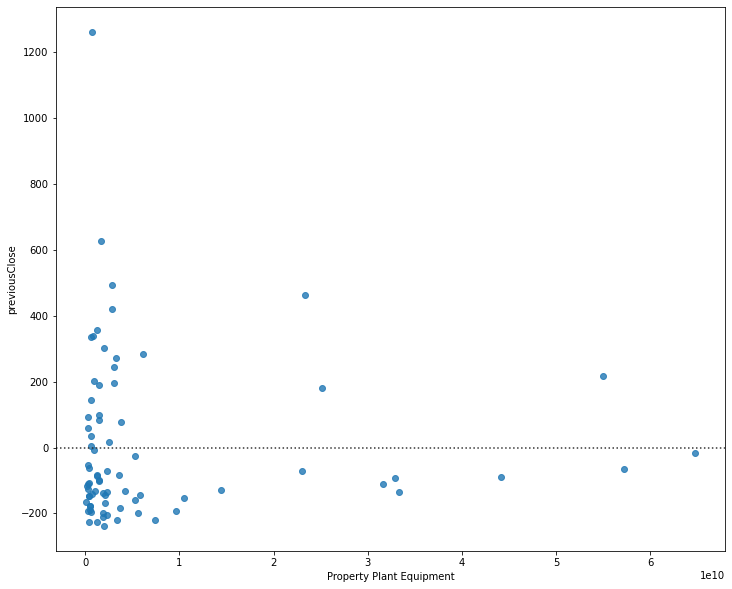

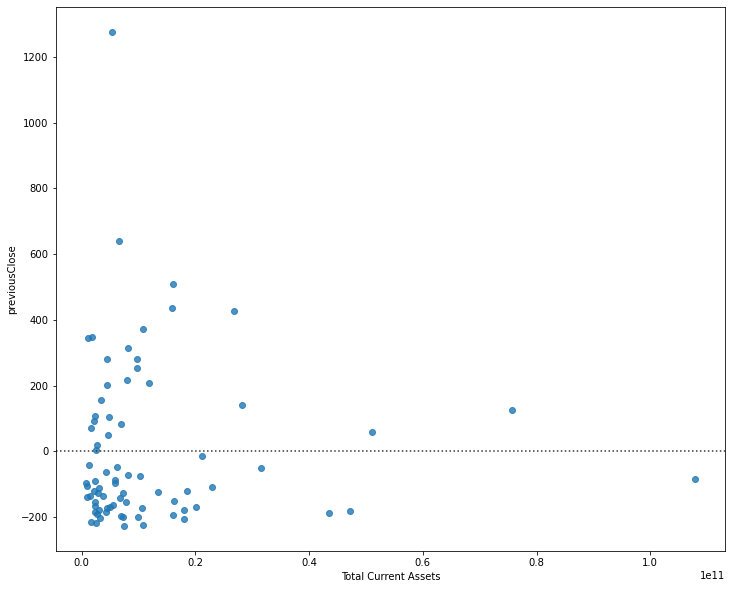

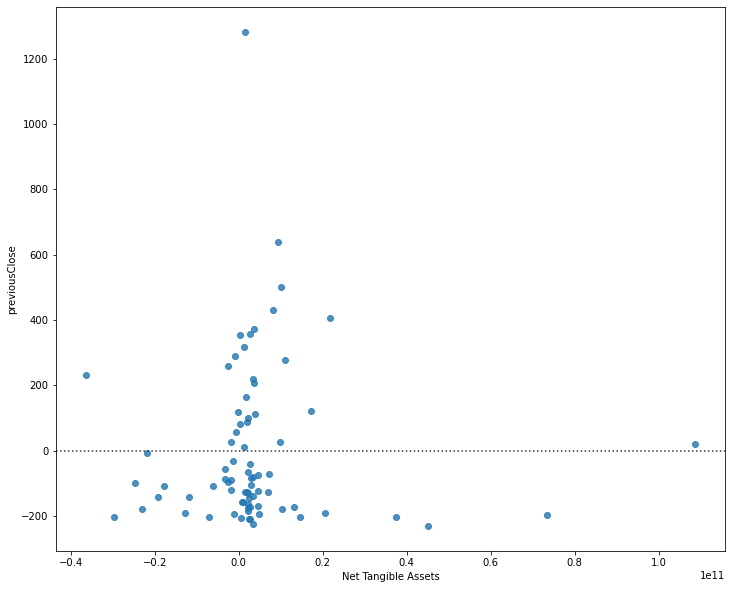

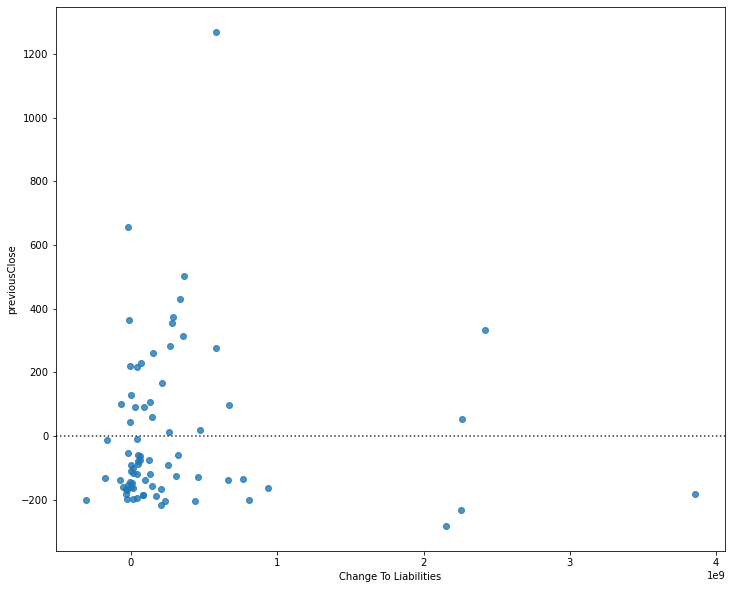

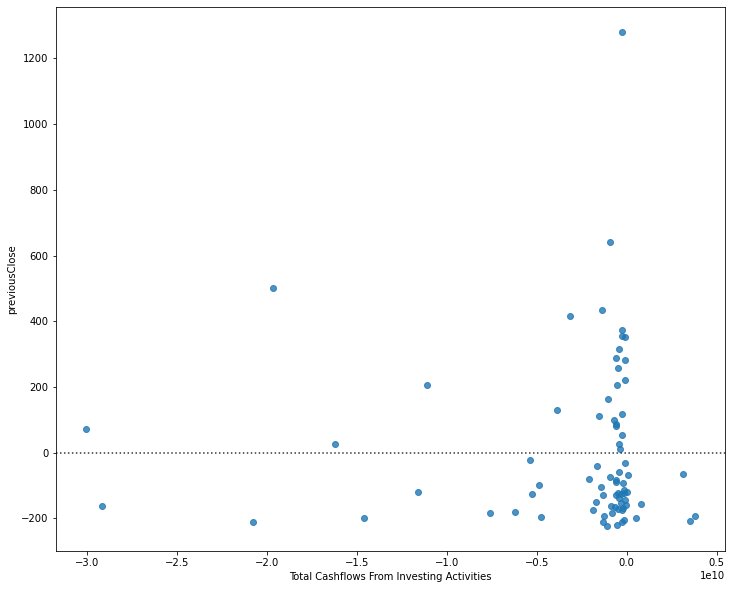

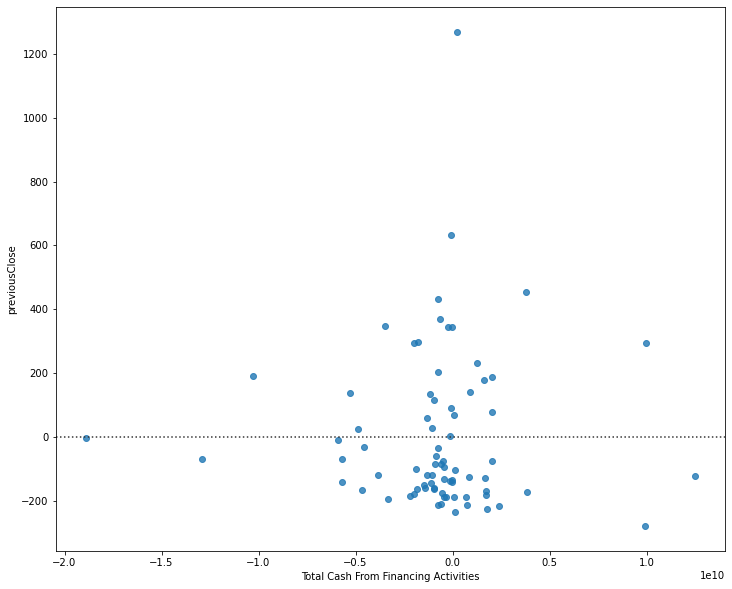

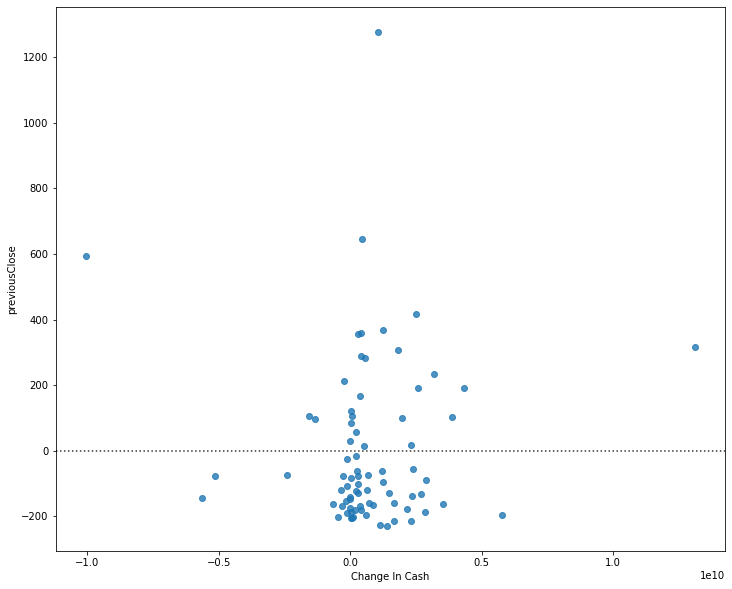

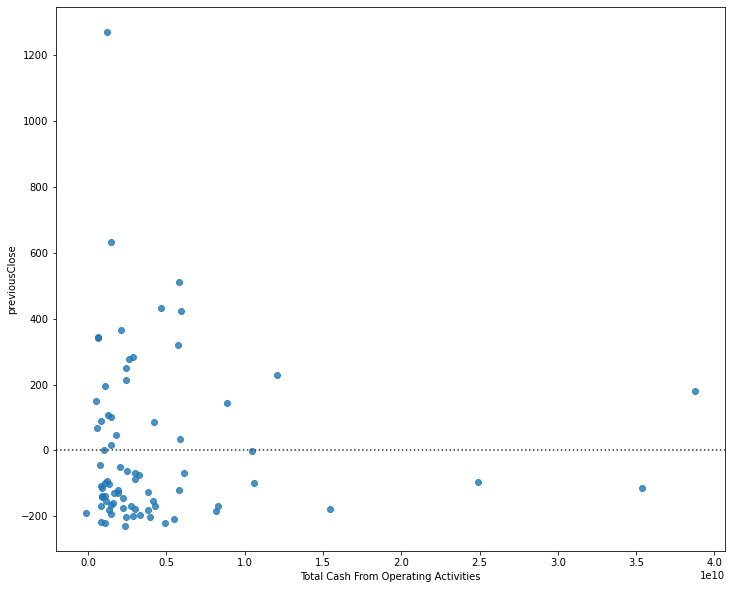

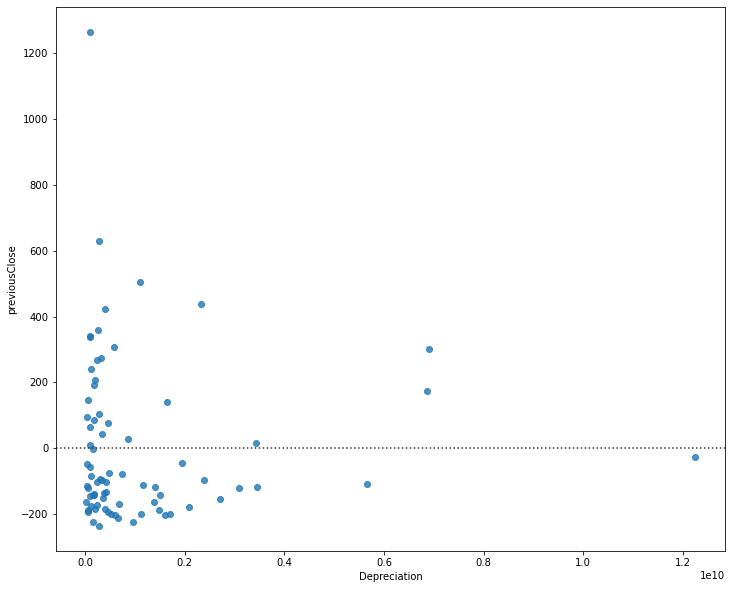

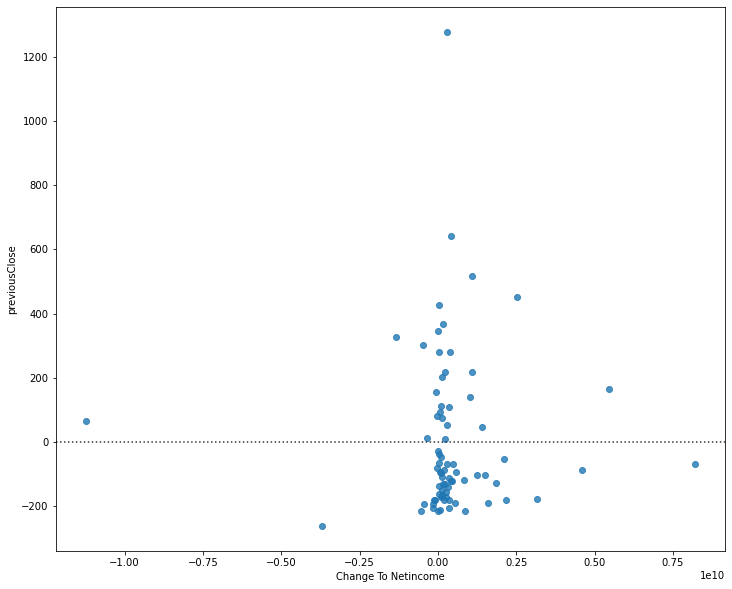

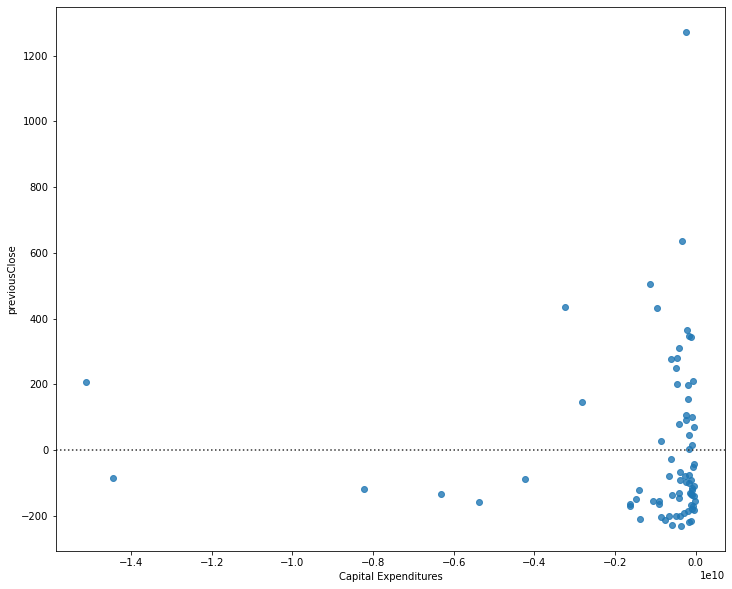

In [66]:
#let's see the residual plots again
for i in new_cleaned_data.columns:
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    sns.residplot(new_cleaned_data[i], new_cleaned_data['previousClose'])
    plt.show()

Seems that a linear model is fine for our data, there's however some x-axis imbalance in many variables, meaning that they might not be good predictor variables and that there maybe underlying explanatory variables which are not identified. Since our data base is NASDAQ-100, the variables might be too similar (they are all big companies), including companies of different scales might solve the problem.

In [67]:
#standardize the data
import numpy as np
from sklearn import preprocessing
new_cleaned_data_columns_names=new_cleaned_data.columns.tolist()
new_cleaned_data_columns_names.remove('previousClose')
X = np.asarray(new_cleaned_data[new_cleaned_data_columns_names])
X[0:5]

array([[ 7.16875940e+10,  6.46433505e+10,  7.54000000e+00,
         2.02900000e+01,  2.69570000e-01,  6.42096200e+06,
         5.73866200e+06,  9.00000000e+02,  8.00000000e+02,
         7.77017024e+08,  8.96565700e+06,  1.15000000e-02,
         2.31100006e+09,  1.43000000e+00,  7.71220214e+08,
         8.09000100e-03,  2.61600000e+09,  2.19700000e+09,
         5.82600000e+09,  2.82800000e+09,  2.82800000e+09,
         4.19000000e+08,  8.08600000e+09,  5.25800000e+09,
        -2.12000000e+08,  2.19700000e+09,  2.19700000e+09,
         8.07200000e+09,  1.50370000e+10,  2.31090000e+10,
         1.14300000e+09,  1.71600000e+09,  8.64700000e+09,
         3.10000000e+09,  4.52000000e+08,  1.05650000e+10,
         4.66100000e+09,  2.06000000e+08, -1.78000000e+08,
         7.11000000e+08,  2.85400000e+09,  2.25200000e+09,
         1.97000000e+08,  2.48000000e+08, -7.80000000e+07],
       [ 2.77077459e+11,  2.74128716e+11,  1.90510000e+01,
         4.78490000e+01,  3.87940000e-01,  2.96867500e+

In [68]:
y = np.asarray(new_cleaned_data['previousClose'])
y [0:5]

array([ 92.51, 578.26, 180.72, 617.39,  82.85])

In [77]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-2.27309595e-01, -2.97172877e-01, -2.97809072e-01,
        -4.53841853e-01,  6.20018011e-01,  4.15277078e-01,
         2.88621305e-01, -5.33686525e-01, -5.91651209e-01,
         2.91646864e-01, -1.16423980e-02, -6.62083473e-01,
        -1.08001562e-01, -1.04606550e+00,  3.18810398e-01,
        -3.96564118e-01, -7.16011394e-02, -8.78190318e-02,
        -2.14092676e-01, -1.07824925e-01, -1.07824925e-01,
        -9.49725605e-03, -3.51982155e-01, -3.66698474e-01,
         1.35979604e-01, -8.19605525e-02, -8.67368725e-02,
        -4.83690811e-01,  1.14056005e-01, -2.13300490e-01,
        -3.81522278e-01, -9.60403871e-04,  1.39551759e+00,
        -3.93212419e-01, -4.86272976e-01, -6.38468675e-02,
         5.17447830e-02, -1.61556473e-01,  4.23197151e-01,
         3.71408046e-01,  8.50221422e-01, -3.15415755e-01,
        -4.64120914e-01, -8.30002617e-02,  4.09307853e-01],
       [ 1.20625945e+00,  1.21651733e+00,  1.32020109e+00,
         3.59271622e-01,  1.58459007e+00, -2.38715481e-

In [70]:
standardize_data = pd.DataFrame(X, columns = new_cleaned_data_columns_names, index = new_cleaned_data.index.tolist())
standardize_data

,marketCap,enterpriseValue,enterpriseToRevenue,enterpriseToEbitda,profitMargins,averageDailyVolume10Day,averageVolume,askSize,bidSize,sharesOutstanding,sharesShort,sharesPercentSharesOut,netIncomeToCommon,shortRatio,floatShares,heldPercentInsiders,Income Before Tax,Net Income,Gross Profit,Ebit,Operating Income,Income Tax Expense,Total Revenue,Total Operating Expenses,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares,Total Liab,Total Stockholder Equity,Total Assets,Other Liab,Other Assets,Cash,Total Current Liabilities,Property Plant Equipment,Total Current Assets,Net Tangible Assets,Change To Liabilities,Total Cashflows From Investing Activities,Total Cash From Financing Activities,Change In Cash,Total Cash From Operating Activities,Depreciation,Change To Netincome,Capital Expenditures
ATVI,-0.227310,-0.297173,-0.297809,-0.453842,0.620018,0.415277,0.288621,-0.533687,-0.591651,0.291647,-0.011642,-0.662083,-0.108002,-1.046066,0.318810,-0.396564,-0.071601,-0.087819,-0.214093,-0.107825,-0.107825,-0.009497,-0.351982,-0.366698,0.135980,-0.081961,-0.086737,-0.483691,0.114056,-0.213300,-0.381522,-0.000960,1.395518,-0.393212,-0.486273,-0.063847,0.051745,-0.161556,0.423197,0.371408,0.850221,-0.315416,-0.464121,-0.083000,0.409308
ADBE,1.206259,1.216517,1.320201,0.359272,1.584590,-0.238715,-0.352029,-0.675880,-0.404942,-0.127811,-0.411445,-0.747272,0.591000,-0.018254,-0.097103,-0.483891,0.232440,0.609898,0.254621,0.169263,0.169263,-1.728406,-0.181814,-0.234330,0.249474,0.617188,0.611012,-0.335704,0.025690,-0.180161,-0.437993,0.129973,0.285592,-0.128504,-0.372386,-0.207929,-0.134826,0.061817,0.385370,-0.660290,0.440943,0.214369,-0.266189,-0.454292,0.279511
ALXN,-0.445766,-0.481223,-0.478291,-0.698316,-0.689329,-0.414123,-0.384069,-0.533687,0.528606,-0.488301,-0.063855,1.874633,-0.456156,1.422439,-0.459028,-0.478651,-0.470558,-0.450823,-0.241370,-0.097323,-0.097323,-0.528029,-0.423725,-0.447913,-1.442726,-0.445709,-0.449758,-0.565023,-0.054691,-0.354487,-0.162230,0.331702,-0.117352,-0.555121,-0.416062,-0.345697,-0.010413,-0.287581,0.115209,0.046370,-0.164199,-0.200936,-0.405218,0.868767,0.398384
ALGN,-0.387985,-0.425410,0.983414,1.105646,-0.250843,-0.642170,-0.646262,-0.675880,-0.591651,-0.687332,-0.713210,0.814513,-0.503953,0.675738,-0.666716,0.644192,-0.507598,-0.183744,-0.572039,-0.587828,-0.587828,-2.086299,-0.551759,-0.491227,0.289144,-0.178082,-0.182666,-0.808788,-0.474208,-0.728839,-0.592384,-0.053837,-0.650791,-0.587946,-0.459469,-0.582961,-0.055036,-0.049358,0.414621,0.189145,-0.124572,-0.557794,-0.518876,-0.895810,0.380031
AEP,-0.431982,-0.184310,-0.627568,-0.641608,-0.374297,-0.241623,-0.244660,0.035087,1.275445,-0.097300,0.268138,0.464294,-0.114648,1.018342,-0.065182,-0.533492,-0.145429,-0.087113,-0.113654,-0.053017,-0.053017,-0.442369,-0.108846,-0.109504,-0.358211,-0.082029,-0.086031,2.122172,0.388867,1.412575,3.906042,3.494556,-0.802050,0.355992,4.233287,-0.433938,0.896455,-0.525745,-0.547474,0.788043,-0.285986,-0.074398,0.866627,-0.439112,-1.965099
AMGN,0.245534,0.386582,-0.468030,-0.676128,0.717641,-0.262963,-0.274417,-0.107107,-0.591651,0.007634,0.098385,-0.094162,0.912186,0.517614,0.039705,-0.504150,1.003652,1.066387,0.969939,1.170439,1.170439,0.505146,0.264994,0.058624,-0.602864,1.074612,1.067522,1.798705,-0.166441,0.910295,1.315307,0.965140,0.761617,0.545447,-0.130743,0.566265,-1.363164,-0.404550,-0.413973,-0.999111,-0.196910,0.941585,1.252170,-0.205567,0.207571
ANSS,-0.518733,-0.551203,1.025021,0.373493,0.579192,-0.701116,-0.672642,-0.391493,-0.031522,-0.676088,-0.853485,-0.908183,-0.503507,-0.747385,-0.647125,-0.458741,-0.485190,-0.489437,-0.595524,-0.565348,-0.565348,-0.420025,-0.579895,-0.526741,0.289641,-0.484402,-0.488373,-0.796394,-0.431146,-0.697508,-0.594844,-0.604846,-0.663616,-0.653440,-0.502253,-0.590723,-0.177404,-0.432004,0.353272,0.220449,-0.272073,-0.575306,-0.512151,-0.146950,0.425534
AMAT,0.141134,0.122926,-0.487146,-0.454284,0.244848,0.634265,1.024721,

In [78]:
#let's try to build a model to predict price
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [90]:
#split our data into test and train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (61, 45) (61,)
Test set: (16, 45) (16,)


In [91]:
lm.fit(X_train, y_train)

LinearRegression()

In [92]:
#let's see how well our model perform
y_hat= lm.predict(X_test)
print("Residual sum of squares(MSE): %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score(R2): %.2f' % lm.score(X_test, y_test))

Residual sum of squares(MSE): 308062.74
Variance score(R2): -6.89


As you can see, our model performs terribly. Let's make a distribution plot to see the difference between our predicted values and the true values.

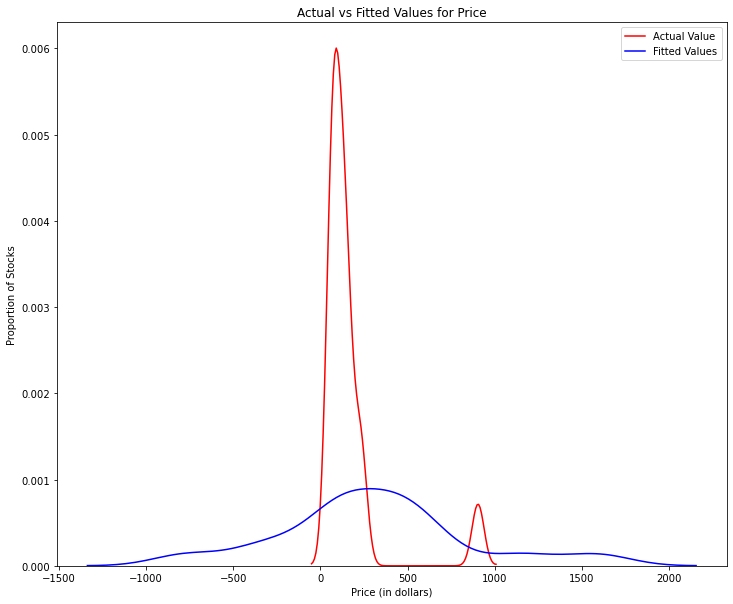

In [93]:
#Building a distribution plot
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Stocks')

plt.show()
plt.close()

In [ ]:
import matplotlib.pyplot as plt
import pylab as pl